# Car Price Predication Model

### Sreenath S

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They want to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

# Business Goal 

Model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


pd.options.display.float_format = '{:.2f}'.format

sns.set(style = 'whitegrid');

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

# Step 1: READING AND UNDERSTANDING THE DATA

In [3]:
#assumes that the dataset file also present in same folder as this notebook
car_data = pd.read_csv('CarPrice_Assignment.csv',  engine = 'python')

Let us first examine the data

In [4]:
car_data.shape

(205, 26)

In [5]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

From the above info, it is very clear that there is no missing values in this dataset

In [7]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [8]:
car_data.car_ID.nunique()

205

Let us extract car company name from CarName and create a new feature "CarMake"

In [9]:
car_data.CarName = car_data.CarName.str.lower()

In [10]:
car_data['CarMake'] = car_data.CarName.apply(lambda x: x.split(" ")[0])

In [11]:
car_data.CarMake.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

As seen above there are a few clean up needed, basically mispelling needs to be corrected

In [12]:
car_data['CarMake'] = car_data['CarMake'].replace({'vw':'volkswagen', 'vokswagen':'volkswagen', 'maxda':'mazda', 'porcshce':'porsche','toyouta':'toyota'})

In [13]:
car_data.CarMake.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarMake'],
      dtype='object')

# Step 2 : DATA ANALYSIS - EDA

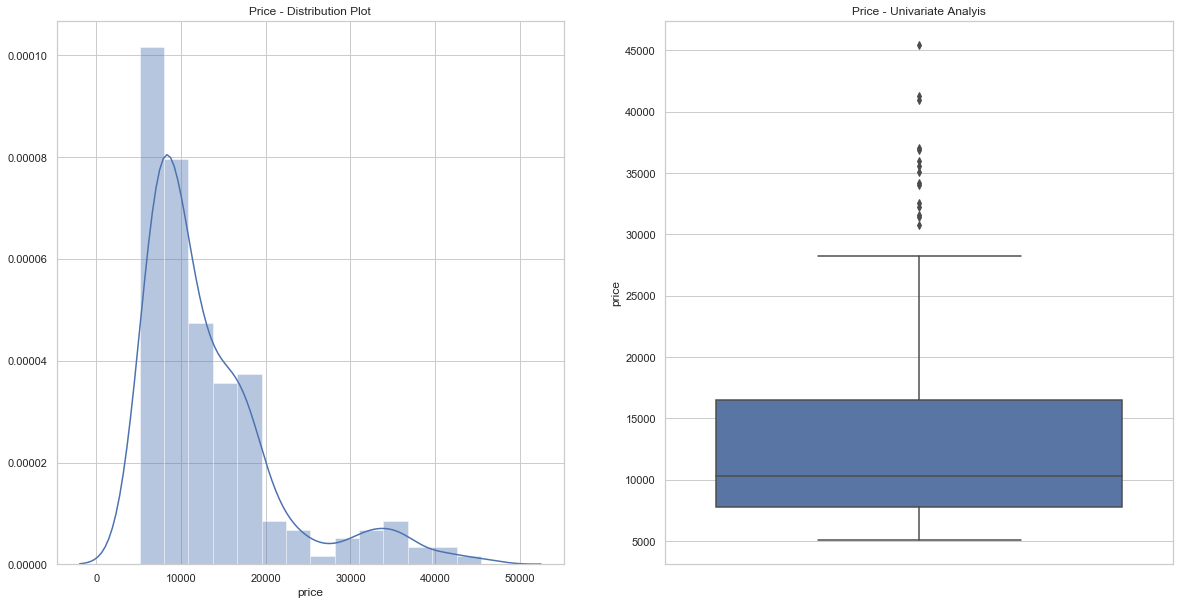

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Price - Distribution Plot')
sns.distplot(car_data.price)

plt.subplot(1,2,2)
plt.title('Price - Univariate Analyis')
sns.boxplot(y=car_data.price)

plt.show()

In [16]:
car_data.price.describe()

count     205.00
mean    13276.71
std      7988.85
min      5118.00
25%      7788.00
50%     10295.00
75%     16503.00
max     45400.00
Name: price, dtype: float64

**Observation** - 50 percentile of the cars are priced at the range of 10000$. 

In [17]:
def create_univariate_plots(df, category):
    grouped_data = df.groupby([category])['price'].agg(['mean','count'])
    grouped_data['percentage'] = (grouped_data['count']/len(df))*100
    if len(grouped_data) < 8:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (24, 10))
    else:
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (20, 20))

    ax1 = grouped_data['count'].plot.bar(ax=axes[0])
    kx=-0.15
    ky= 0.5
    
    #grouped_data = grouped_data.sort_values(by = ['mean'])
    ax1.set_title("{} - HISTOGRAM".format(category.upper()))
    ax1.set_ylabel("Count")
    for i,rec in enumerate(ax1.patches):
        ax1.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()+(2*ky),str(round(grouped_data.iloc[i]['percentage'], 2))+'%',fontsize=12, color='black')
        ax1.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()/2, grouped_data.iloc[i]['count'],fontsize=12, color='black')
    
    ax1 = grouped_data['mean'].plot.bar(ax=axes[1])
    kx=-0.15
    ky= 0.5
    ax1.set_title("AVERAGE PRICE AGAINST {}".format(category.upper()))
    ax1.set_ylabel("Avergae Price")
    for i,rec in enumerate(ax1.patches):
        ax1.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()+ky,str(round(grouped_data.iloc[i]['mean'], 2)),fontsize=12, color='black')


In [18]:
# METHOD NAME: create_segmented_univariate_plot
# INPUTS:
#       df - Dataframe for analysis
#       column_name - name of the feature on which univariate analysis needs to be performed , here it is defaulted to price
#       category - Category based on which segmentation to be performed.
#
# DESCRIPTION: This method will group the feature defined by column_name into different segments and plot its boxplot and 
# display the segmented univariate matrices.

def create_segmented_univariate_plot(df, category, column_name = 'price'):
    plt.figure(figsize = (20, 10))
    print("\n\n FATURE'"'{}'"' VS CAR PRICE". format(category.upper()))
    print('---------------------------------')
    sns.boxplot(x=df[category], y=df[column_name])
    plt.show()
    

In [19]:
# METHOD NAME: create_scatterplot
# INPUTS:
#       df - Dataframe for analysis
#       feature - name of the feature to be plotted against price
#
# DESCRIPTION: This method plot a sctter plot between the given feature and price.
def create_scatterplot(df, feature):
    plt.figure(figsize  = (5, 6) )
    ax = sns.scatterplot(df[feature], df['price'])
    ax.set_title('{} VS PRICE'.format(feature.upper()))


<h3>1. CAR MAKE</h3>

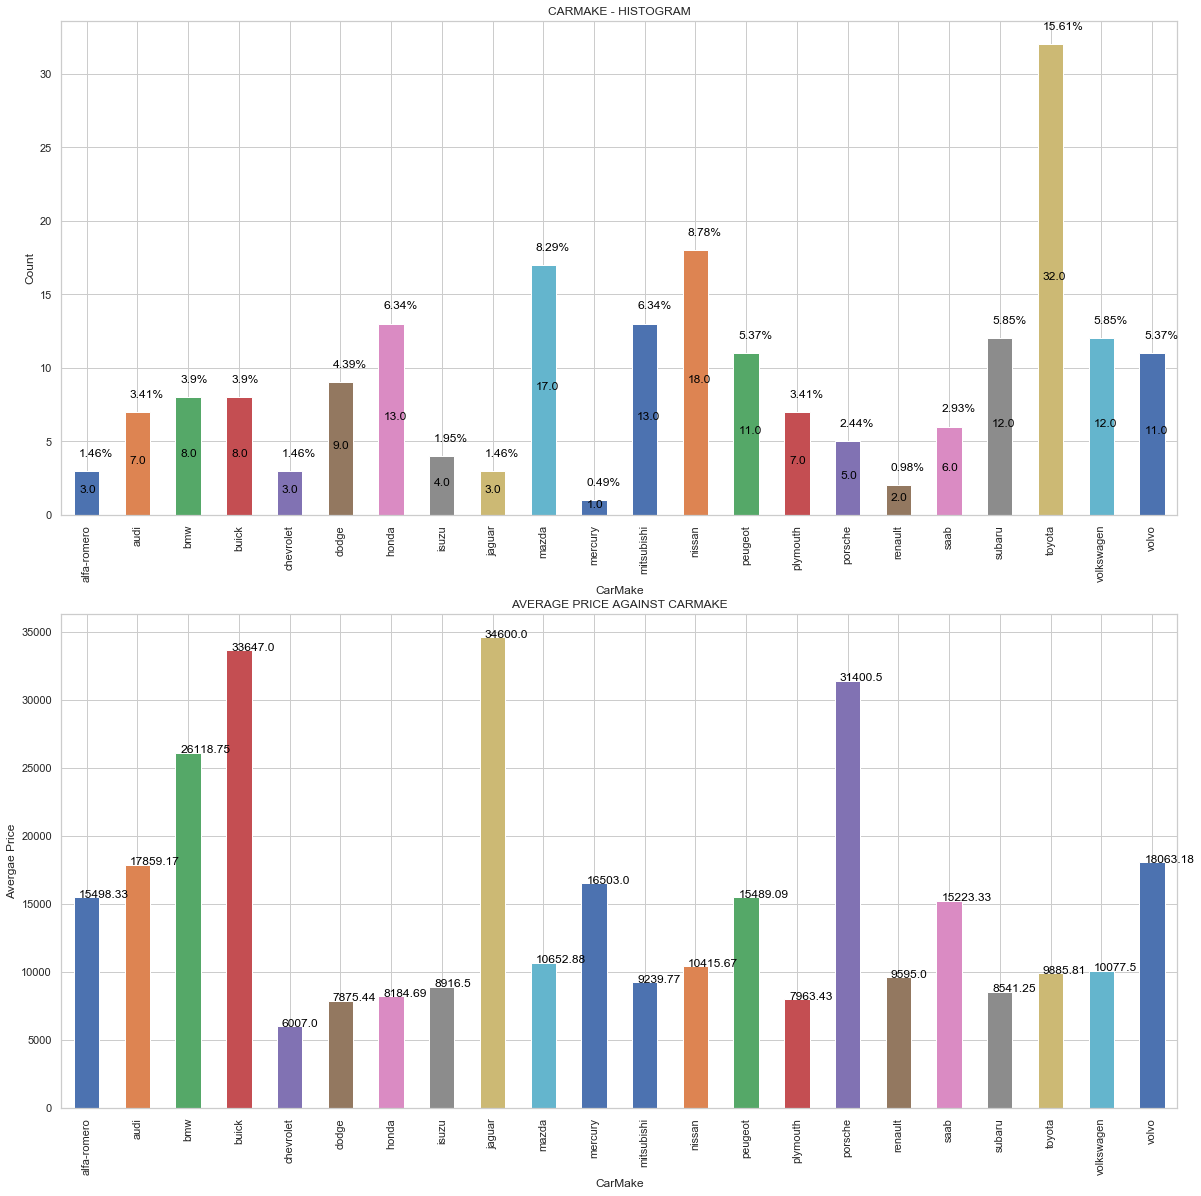

In [20]:
create_univariate_plots(car_data, 'CarMake')



 FATURE'CARMAKE' VS CAR PRICE
---------------------------------


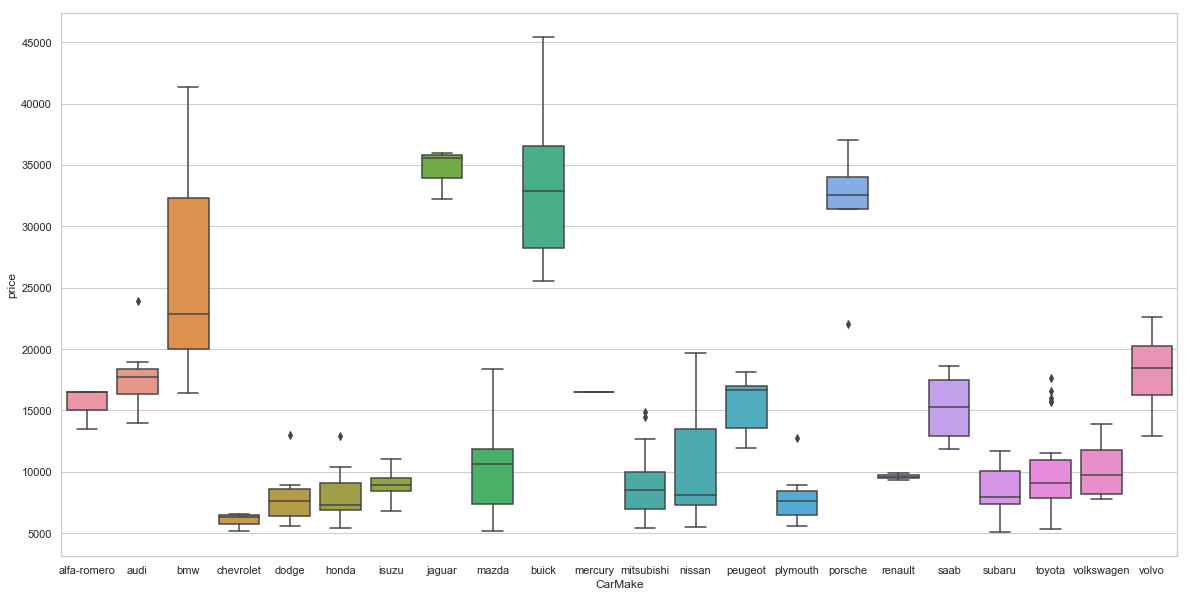

In [21]:
create_segmented_univariate_plot(car_data, 'CarMake')

**Observation**:
    
    Univariate plot shows that most popular brand is Toyotya. In this whole dataset, 15.61% cars are by Toyota
    Segmented analysis indicates the price changes with respect to brand

<h3>2. SYMBOLING</h3>

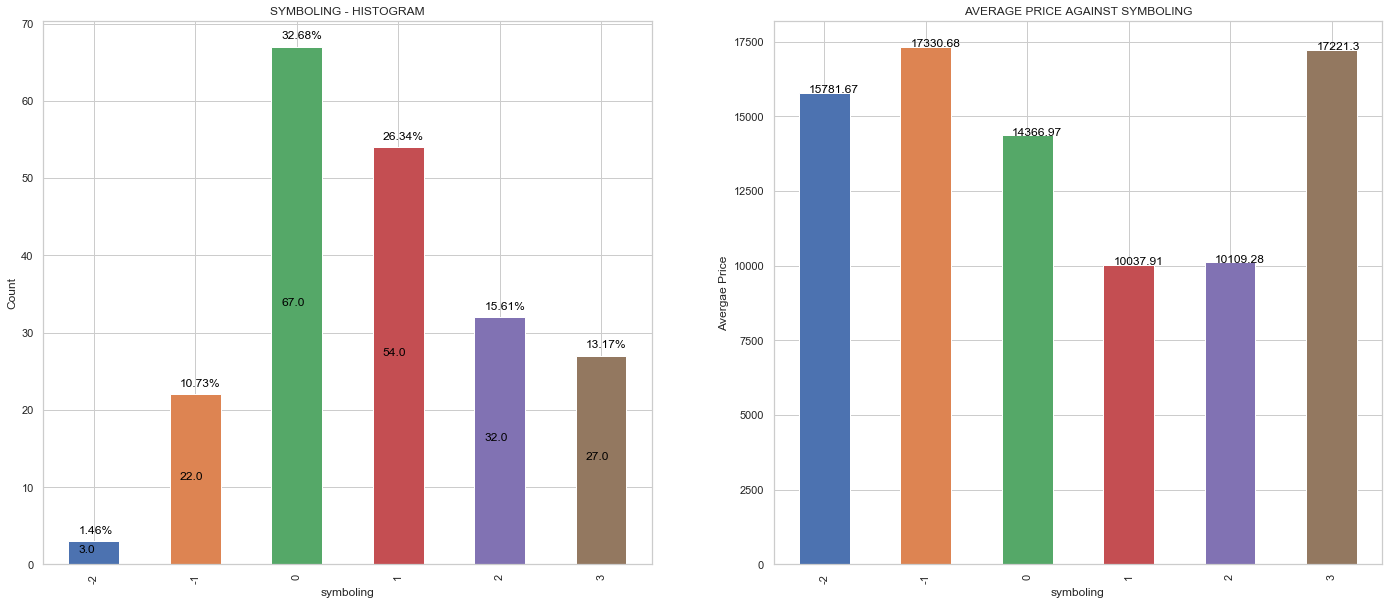

In [22]:
create_univariate_plots(car_data, 'symboling')



 FATURE'SYMBOLING' VS CAR PRICE
---------------------------------


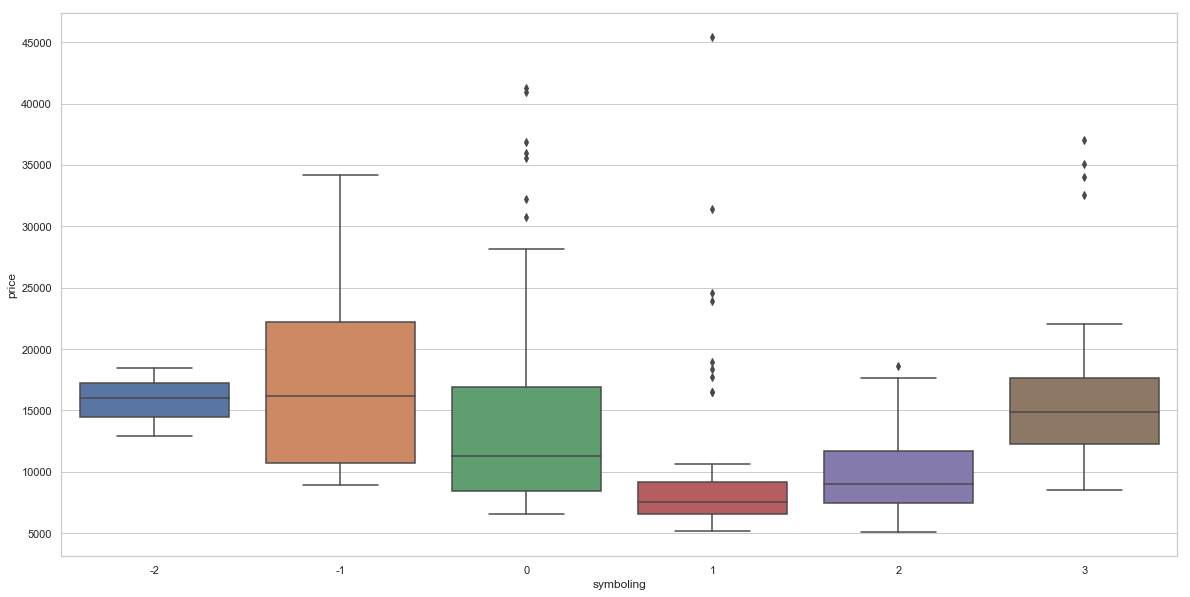

In [23]:
create_segmented_univariate_plot(car_data, 'symboling')

**Observation**:
    
    1. Plot shows that cars with symboling 1 has least price.
    2. Cars with syboling -1 are priced high compared to other symboling group.
    3. It is noted that cars with -2 as symboling also having high price.
    4. But surprisingly the cars with symboling 3 also having higher price.

<h3>3. FUEL TYPE </h3>

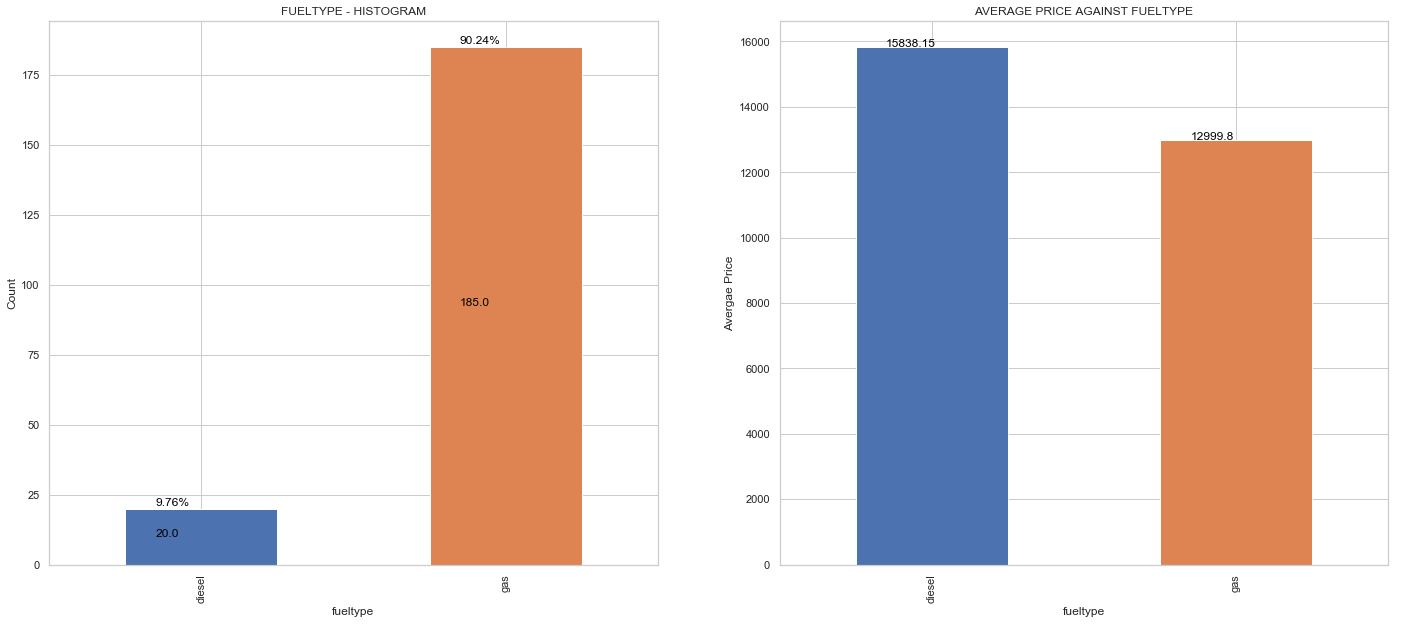

In [24]:
create_univariate_plots(car_data, 'fueltype')



 FATURE'FUELTYPE' VS CAR PRICE
---------------------------------


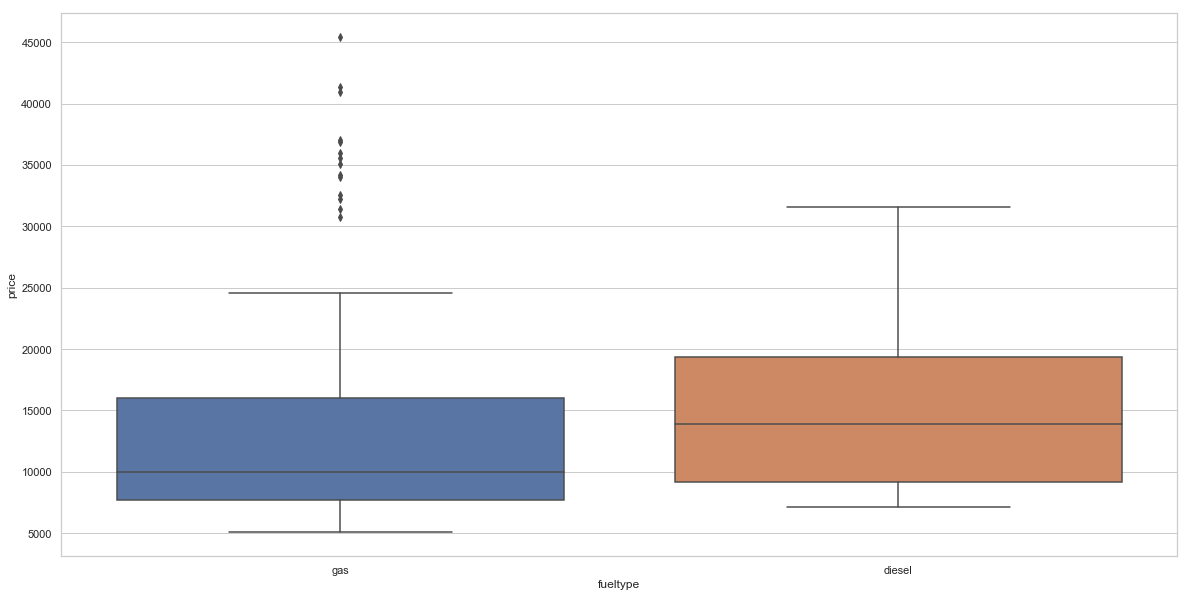

In [25]:
create_segmented_univariate_plot(car_data, 'fueltype')

**Observation**:
    
    1. Univariate plot shows that gasoline cars are most sold compared to diesel cars.
    2. Segmented analysis shows diesel cars are priced high conmpared to gasoline cars.

<h3>4. ASPIRATION </h3>

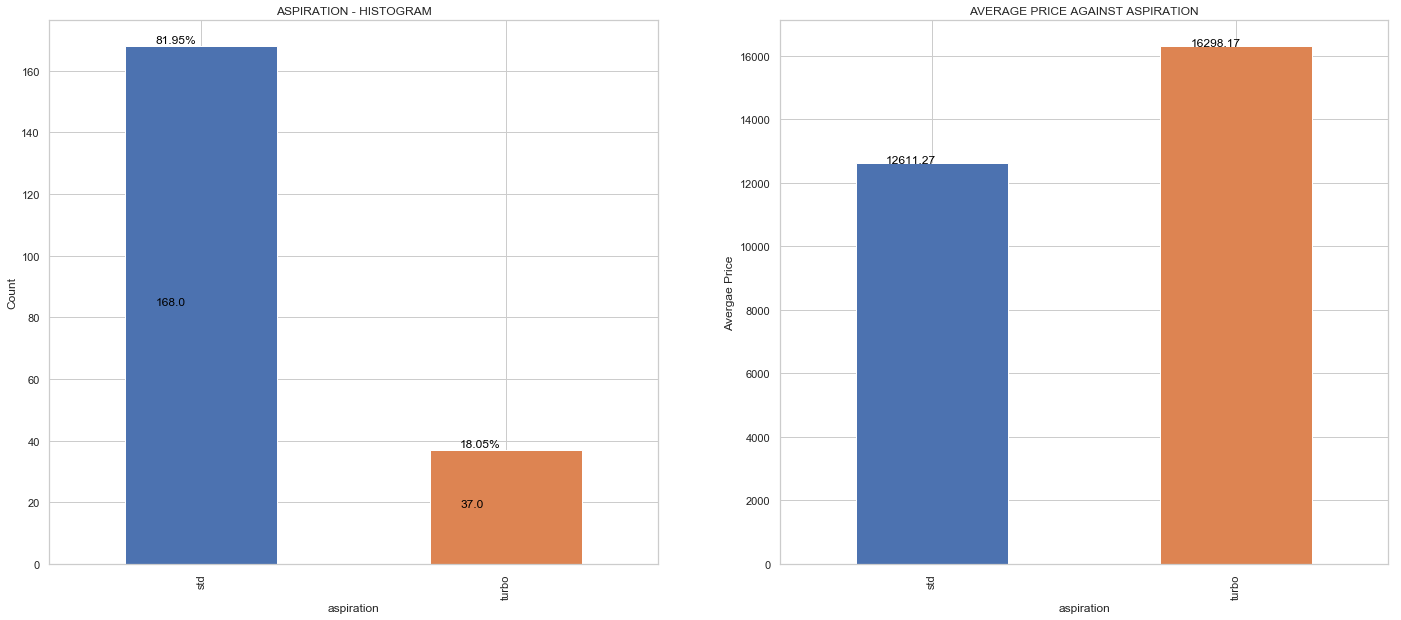

In [26]:
create_univariate_plots(car_data, 'aspiration')



 FATURE'ASPIRATION' VS CAR PRICE
---------------------------------


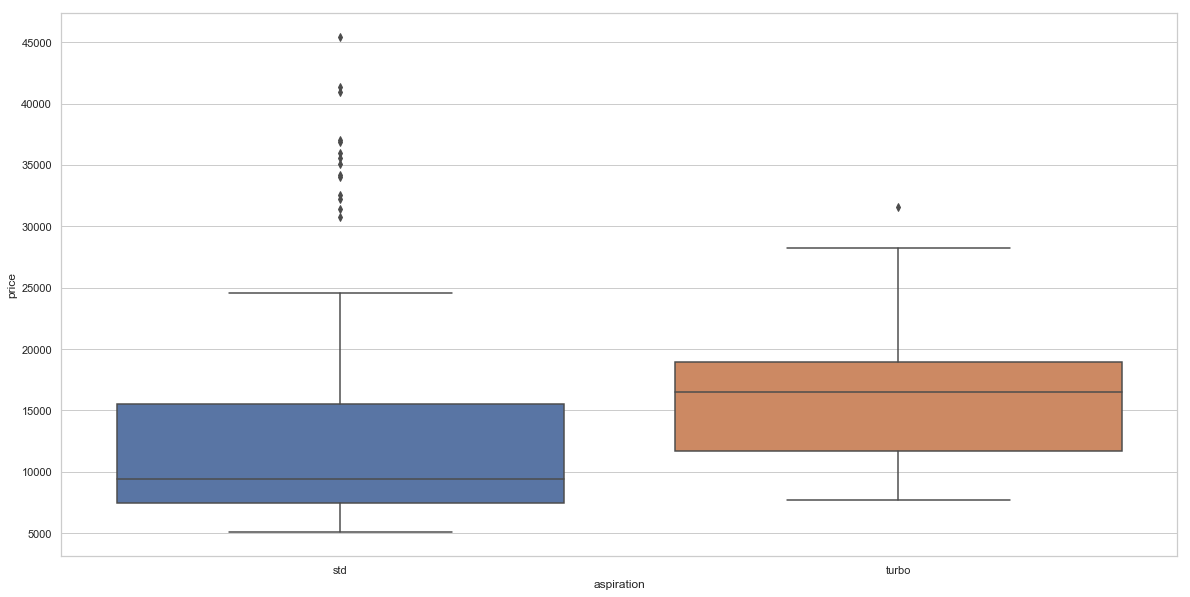

In [27]:
create_segmented_univariate_plot(car_data, 'aspiration')

**Observation**:
    
    1. Univariate plot shows that std aspiration cars are most sold compared to turbo cars.
    2. Segmented analysis shows turbo cars are priced high conmpared to std cars.

<h3>5. DOOR NUMBER</h3>

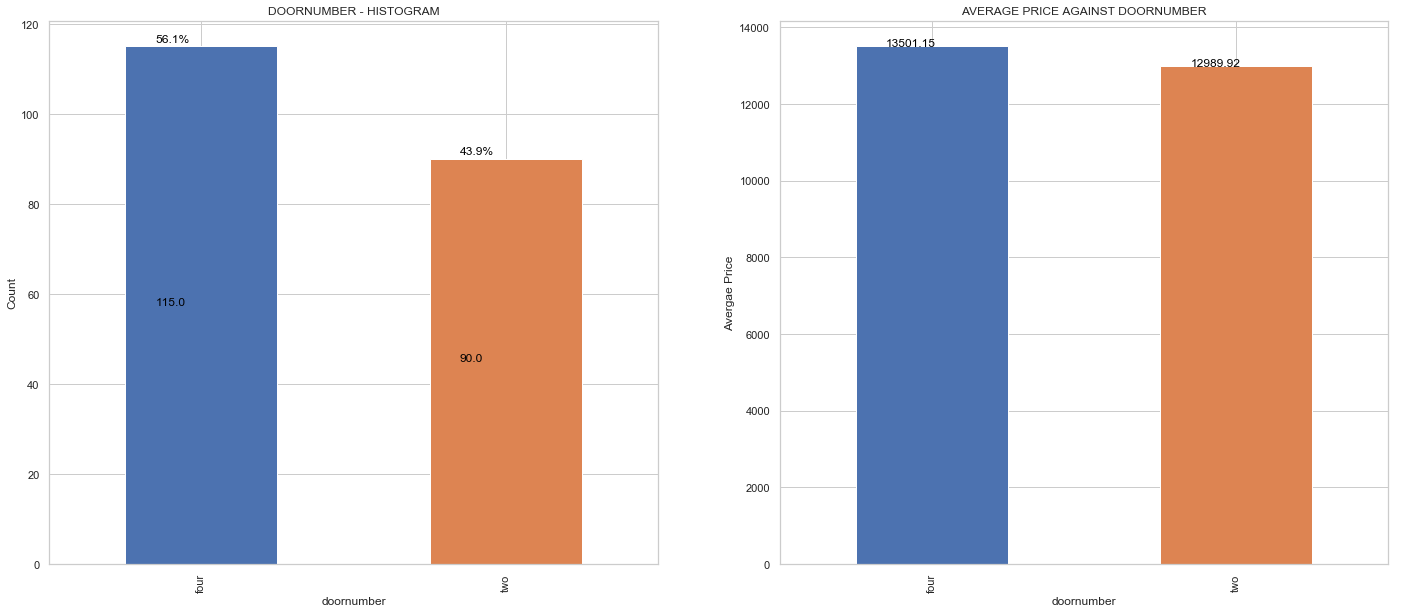

In [28]:
create_univariate_plots(car_data, 'doornumber')



 FATURE'DOORNUMBER' VS CAR PRICE
---------------------------------


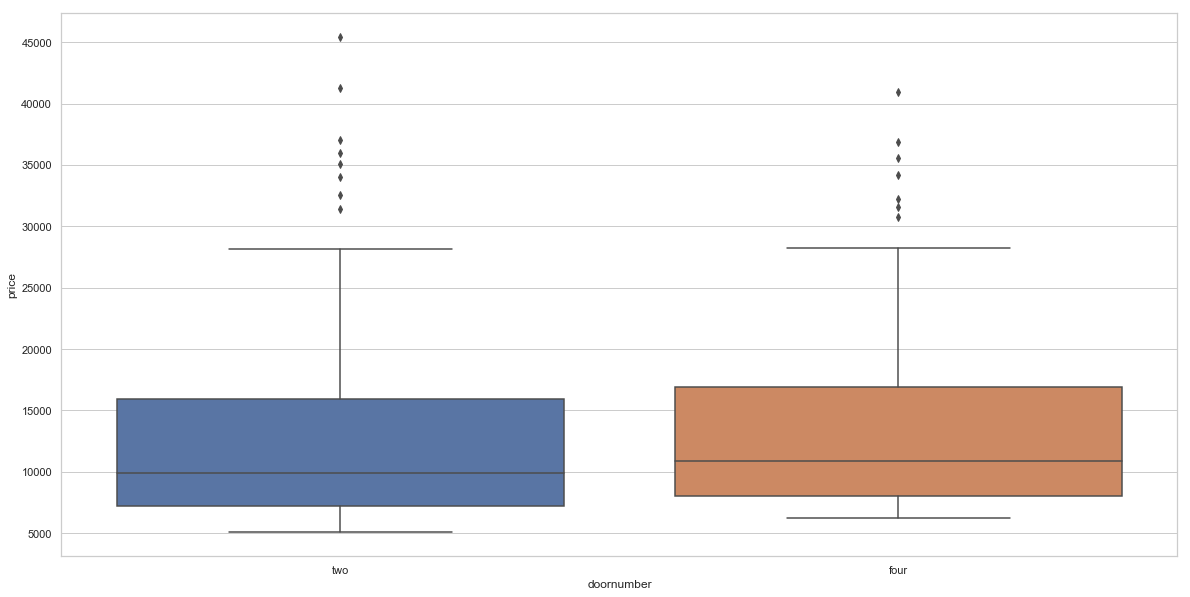

In [29]:
create_segmented_univariate_plot(car_data, 'doornumber')

**Observation**:
    
    1. Four door cars are sold more compared to 2 doors cars.
    2. Segmented analysis shows there si no significant difference in the price of 4 door vs 2 door cars.

<h3>6. CAR BODY </h3>

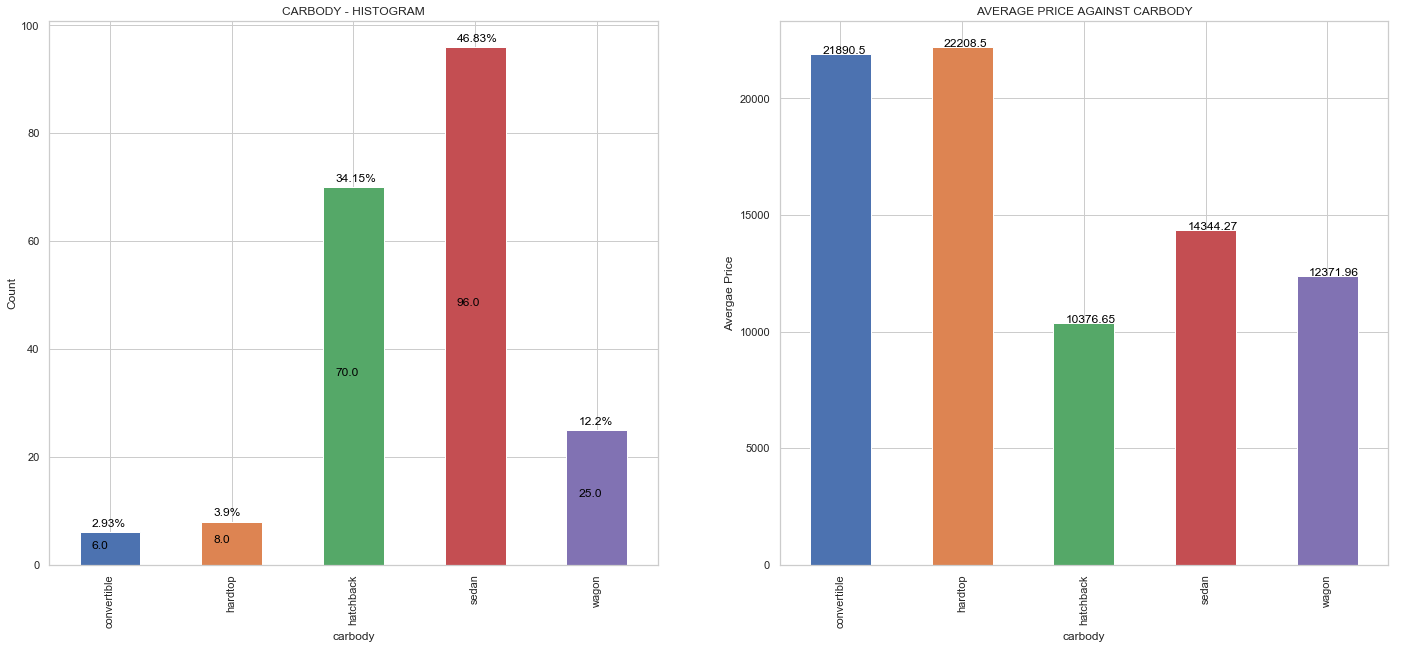

In [30]:
create_univariate_plots(car_data, 'carbody')



 FATURE'CARBODY' VS CAR PRICE
---------------------------------


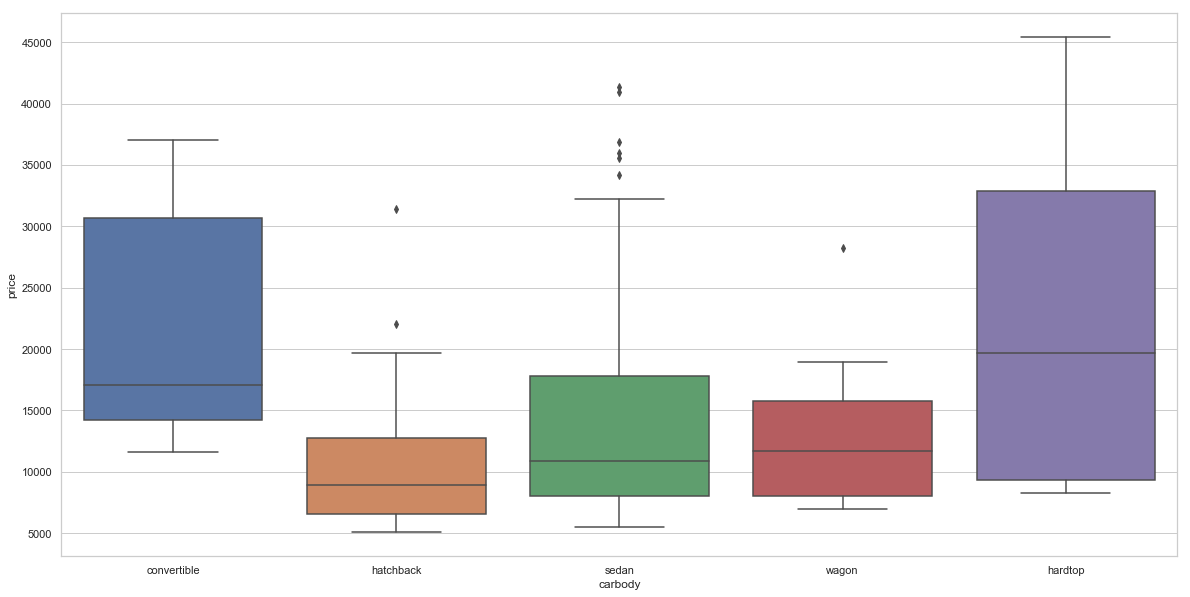

In [31]:
create_segmented_univariate_plot(car_data, 'carbody')

**Observation**:
    
    1. Convertible and teardrop cars are priced high compred to other segments.
    2. There is a significant difference in price when compared with different body types.

<h3>7. DRIVE WHEEL</h3>

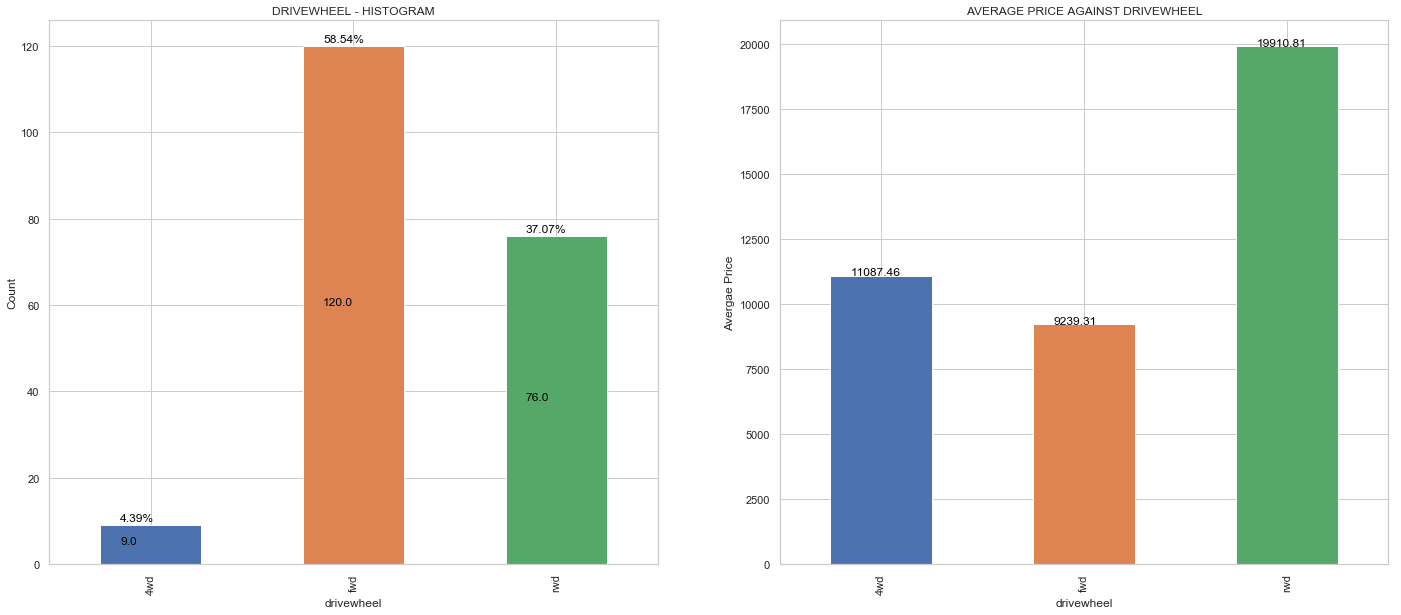

In [32]:
create_univariate_plots(car_data, 'drivewheel')



 FATURE'DRIVEWHEEL' VS CAR PRICE
---------------------------------


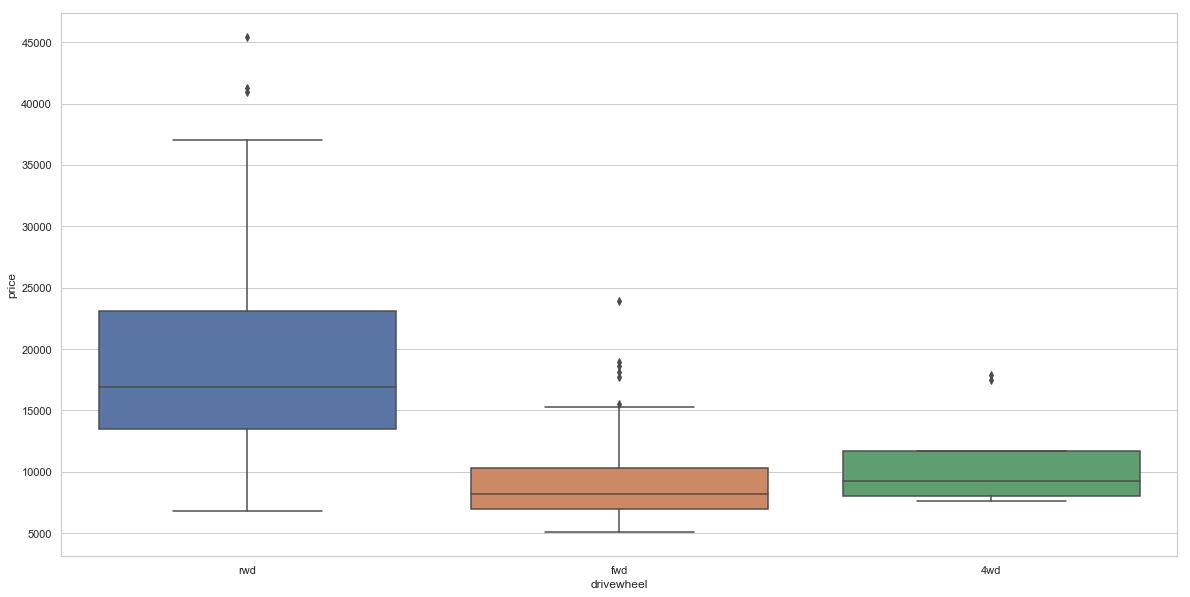

In [33]:
create_segmented_univariate_plot(car_data, 'drivewheel')

**Observation**:
    
    1. Rearwheel drive cars are priced very high compred to 4 Wheel driver, or front wheel drive cars.
    2. Segmented analysis shows there is no significant difference in the price when compared across drive wheel category.

<h3>8. ENGINE LOCATION</h3>

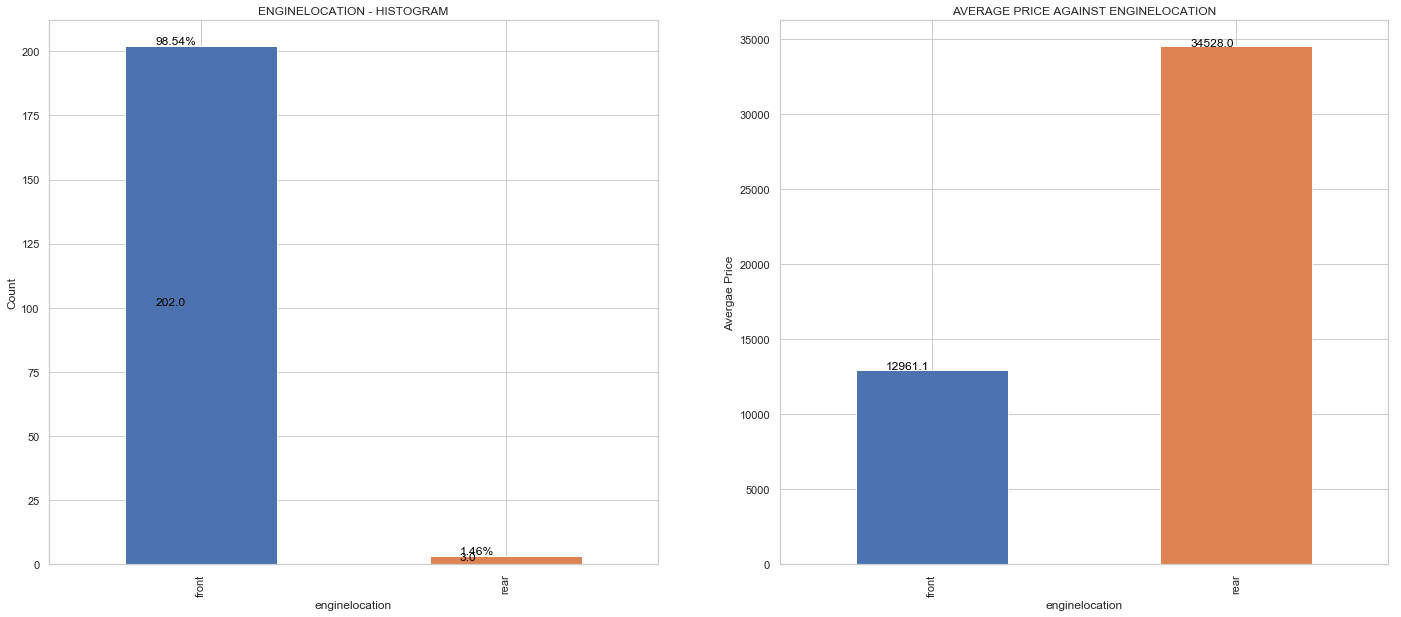

In [34]:
create_univariate_plots(car_data, 'enginelocation')



 FATURE'ENGINELOCATION' VS CAR PRICE
---------------------------------


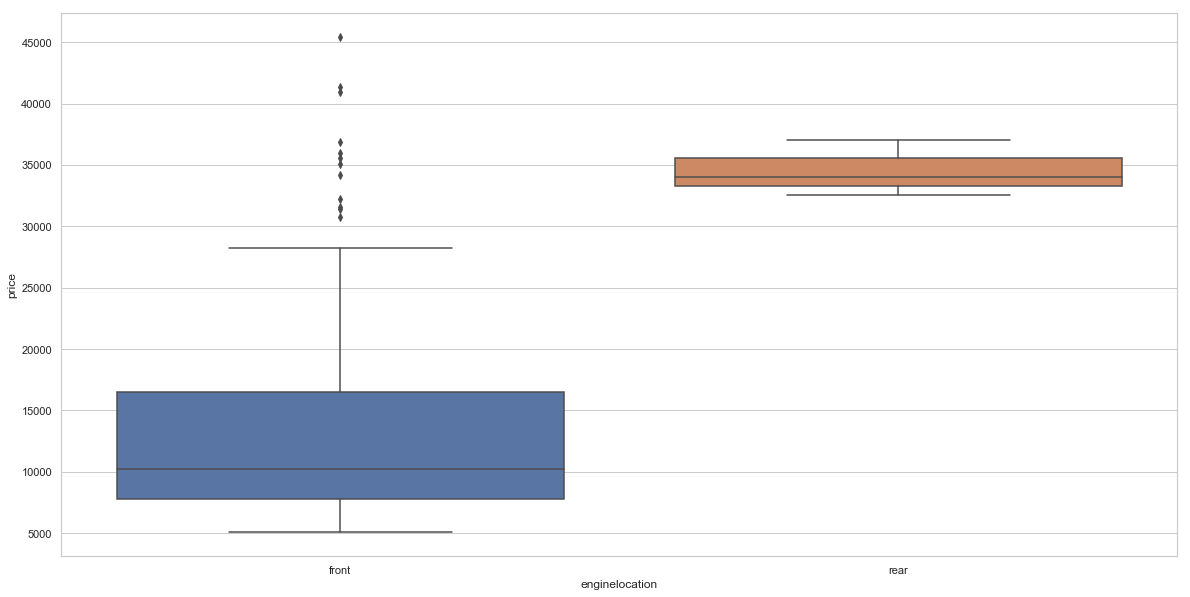

In [35]:
create_segmented_univariate_plot(car_data, 'enginelocation')

**Observation**:
    
1. There are only 3 cars with rear engine out of 205.
2. Segmented analysis shows rear engine cars are ver highly priced compared to front engine cars.
3. Sice only 1.46% of whole data is correspodning to rear engine cars, we may not consider this feature for further analysis.

<h3>9. ENGINE TYPE</h3>

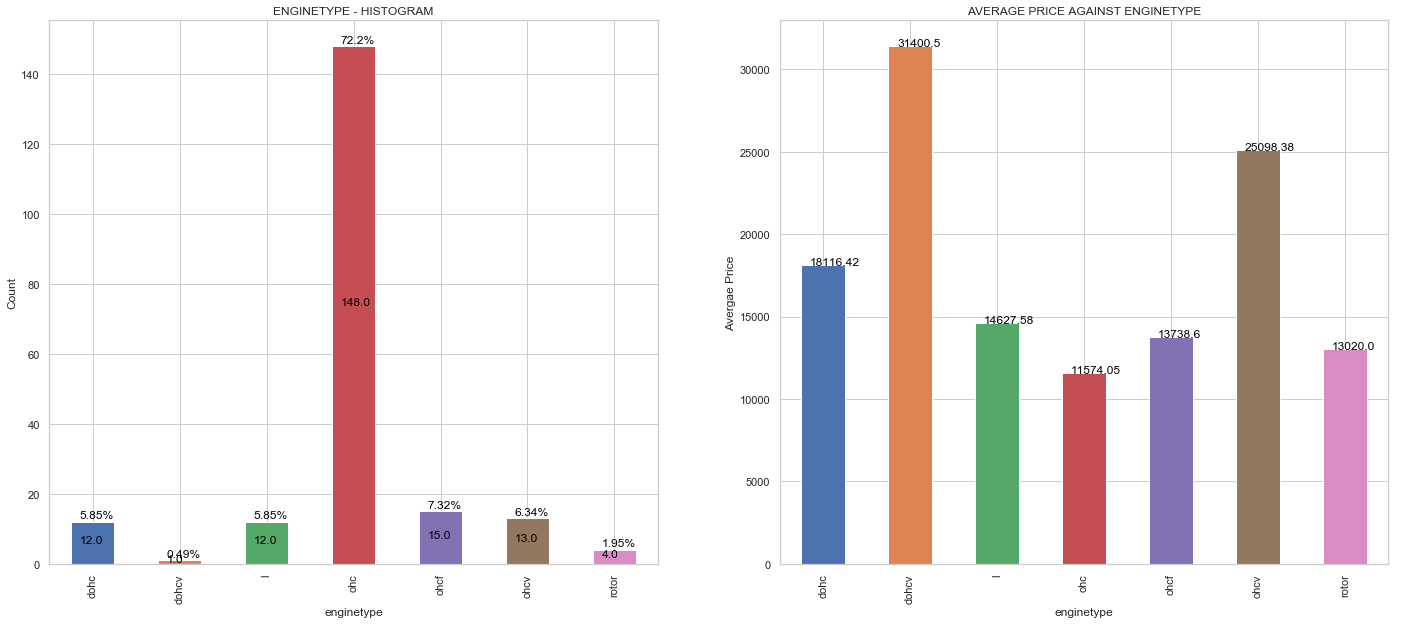

In [36]:
create_univariate_plots(car_data, 'enginetype')



 FATURE'ENGINETYPE' VS CAR PRICE
---------------------------------


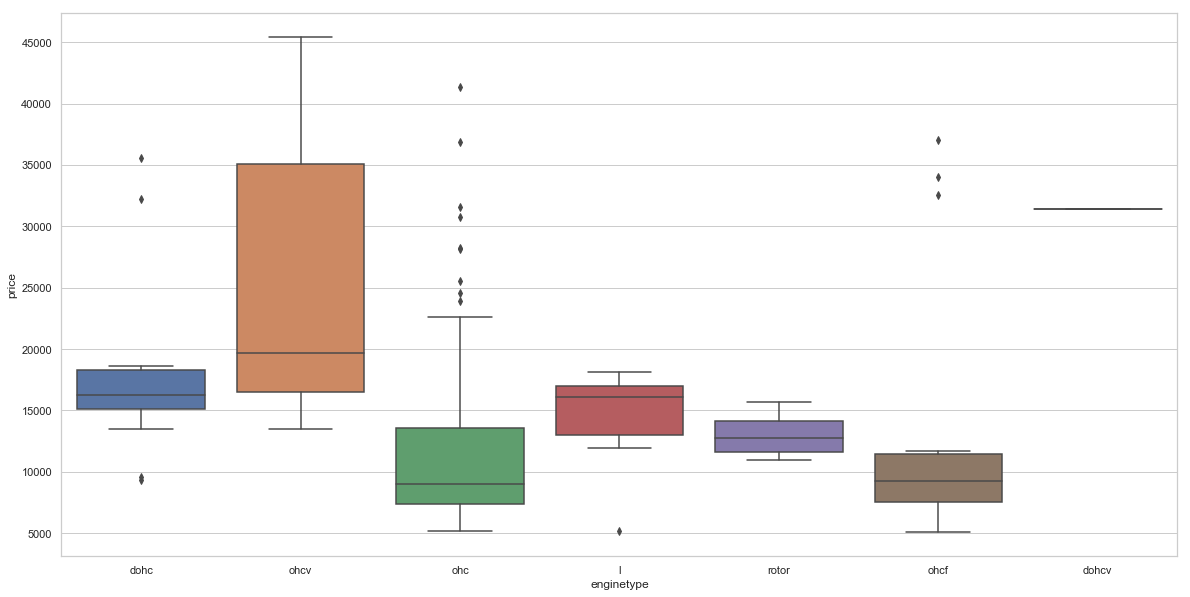

In [37]:
create_segmented_univariate_plot(car_data, 'enginetype')

**Observation**:
    
1. ohc engne type seems to be most preferred one.
2. Segmented analysis shows dohcv is having highest price but only one car is present in the entire data set with dohcv. Followed by ohcv.

<h3>10. CYLINDER NUMBER</h3>

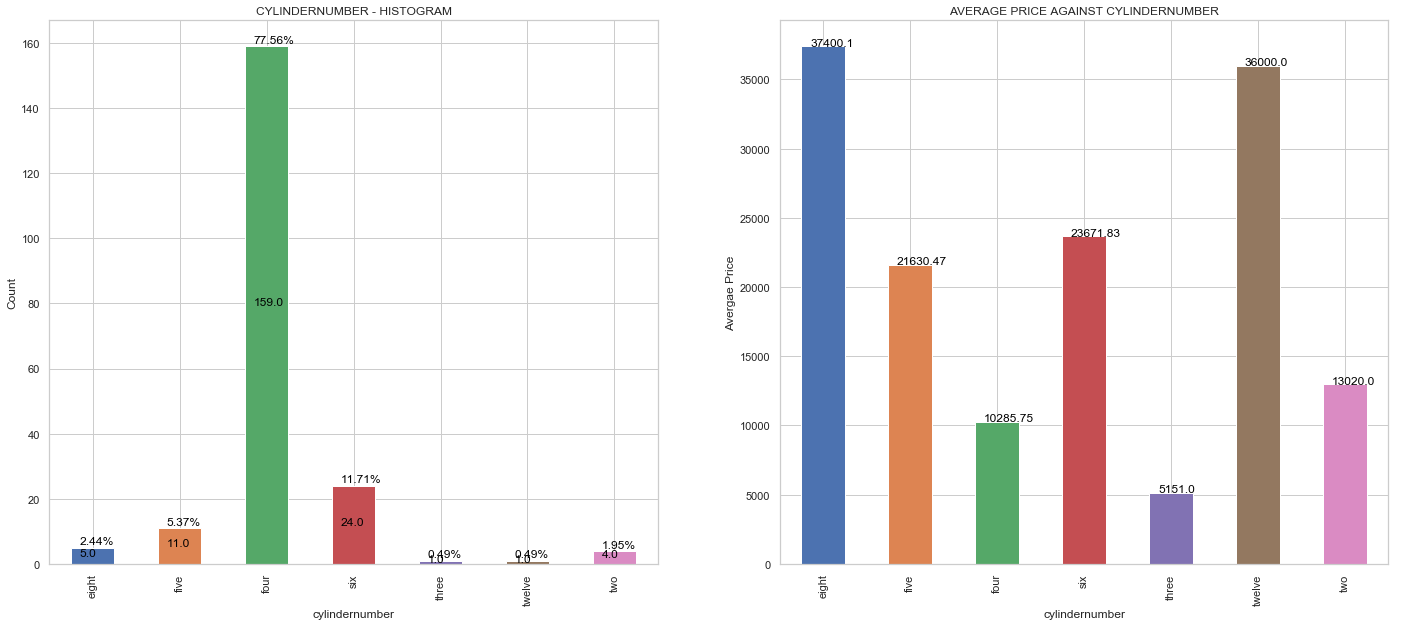

In [38]:
create_univariate_plots(car_data, 'cylindernumber')



 FATURE'CYLINDERNUMBER' VS CAR PRICE
---------------------------------


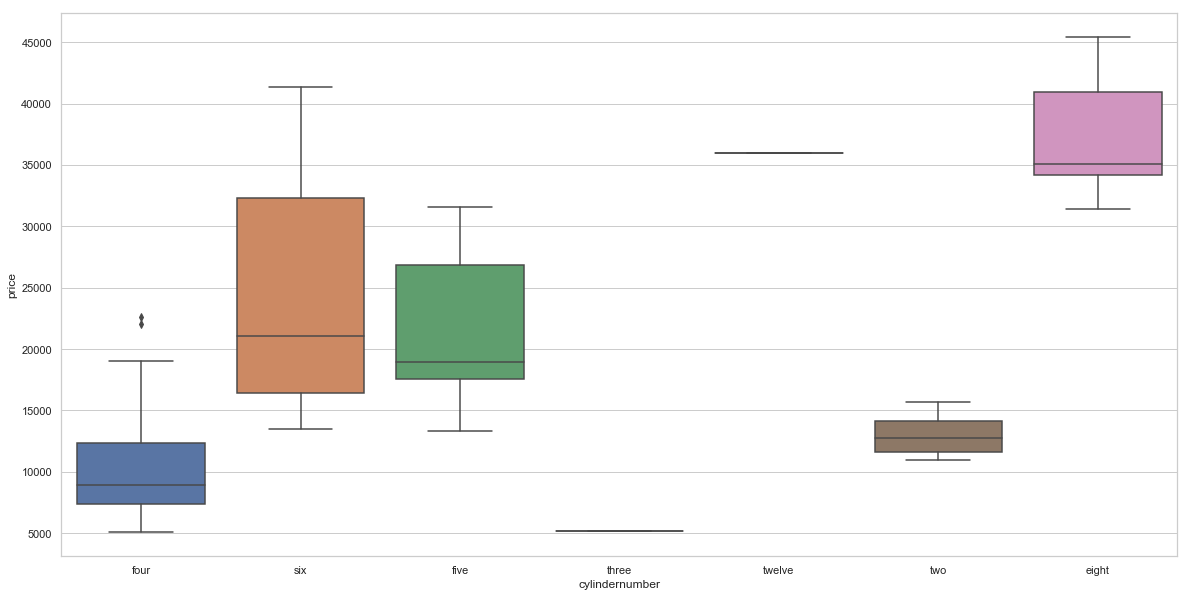

In [39]:
create_segmented_univariate_plot(car_data, 'cylindernumber')

**Observation**:
    
1. 4 cylinder cars seems to be most preferred one.
2. Segmented analysis shows 8 cylinder cars are highest priced compared to other types.

<h3>11. FUEL SYSTEM</h3>

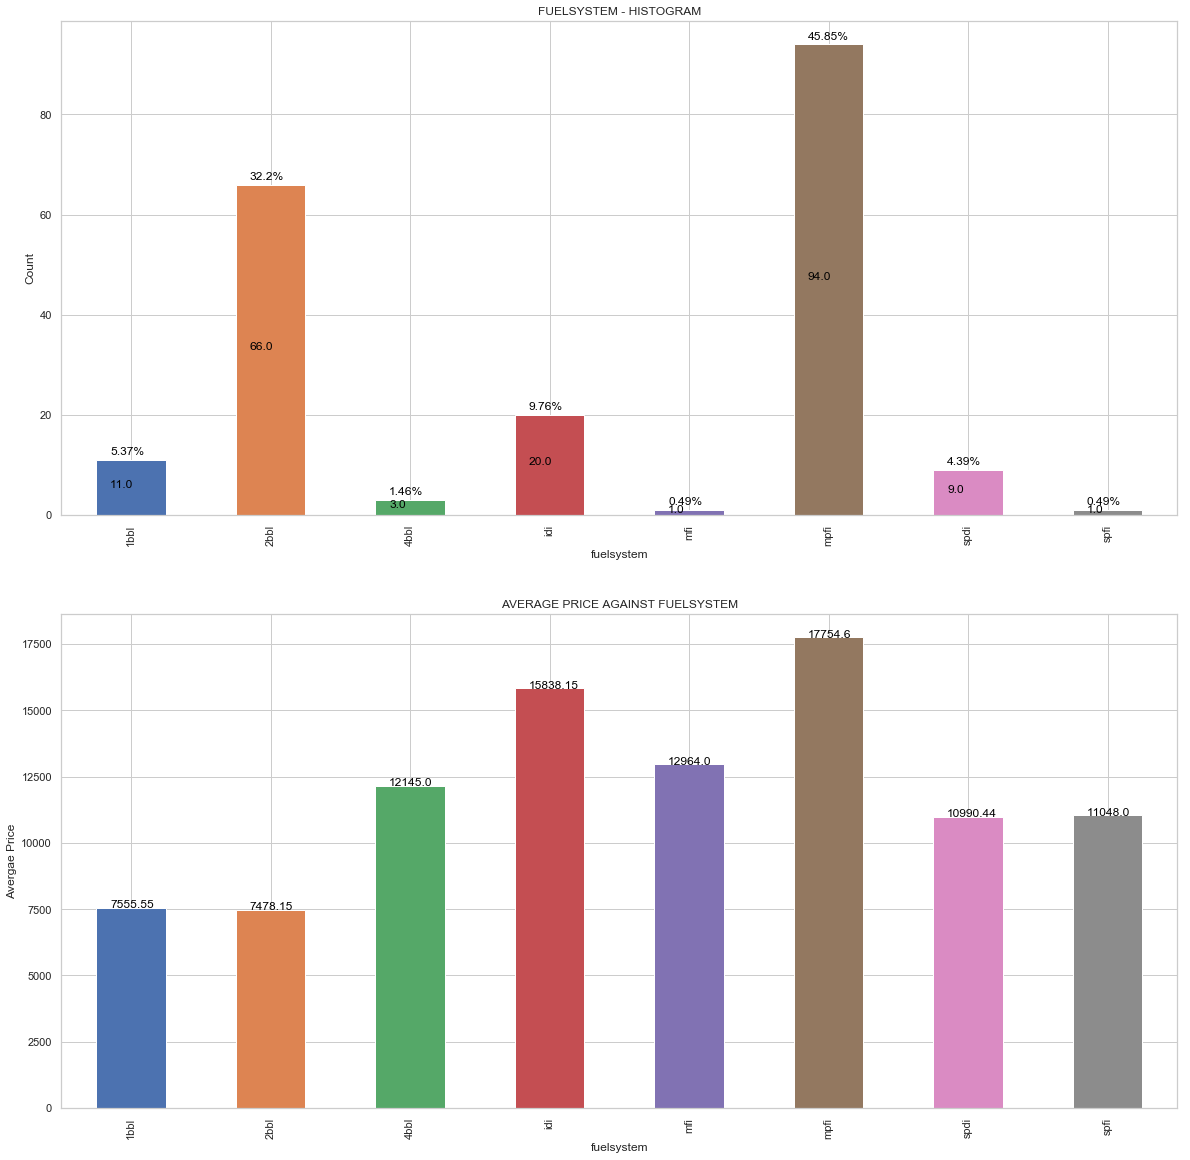

In [40]:
create_univariate_plots(car_data, 'fuelsystem')



 FATURE'FUELSYSTEM' VS CAR PRICE
---------------------------------


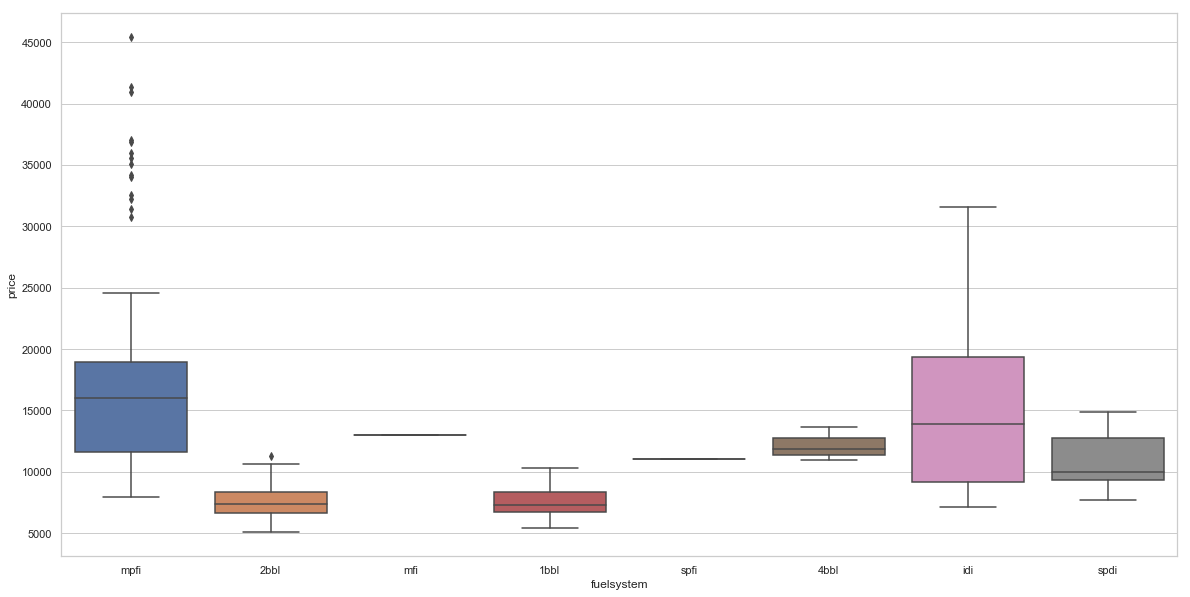

In [41]:
create_segmented_univariate_plot(car_data, 'fuelsystem')

**Observation**

Cars with MPFI fuel systems are most preferred. They are having highest avrage price also
There is a significant difference in price across cars with different fuel system type

wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg	

<h3>12. WHEELBASE</h3>

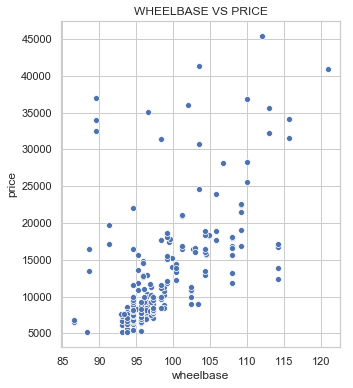

In [42]:
create_scatterplot(car_data, 'wheelbase')

**Observation** - Wheel base shows a positive correlation with price

<h3>13. CAR LENGTH</h3>

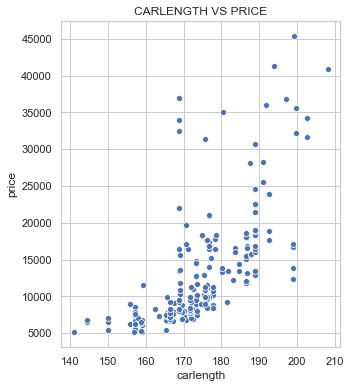

In [43]:
create_scatterplot(car_data, 'carlength')

**Observation** - Car length shows a positive correlation with price

<h3>14. CAR WIDTH </h3>

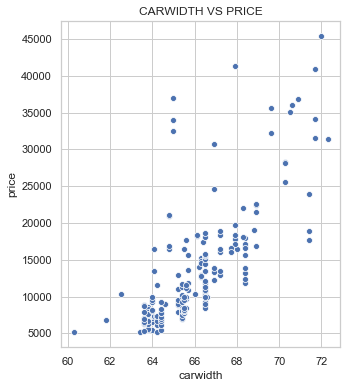

In [44]:
create_scatterplot(car_data, 'carwidth')

**Observation** - Car width shows a positive correlation with price

<h3>15. CAR HEIGHT</h3>

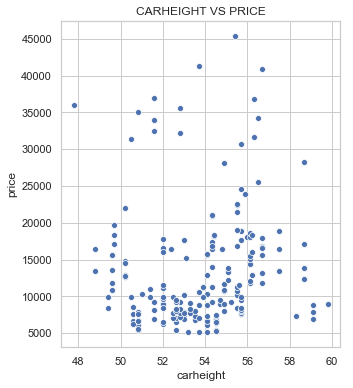

In [45]:
create_scatterplot(car_data, 'carheight')

**Observation** - There is no visible trend or pattern between car height and price

<h3>16. CURB WEIGHT</h3>

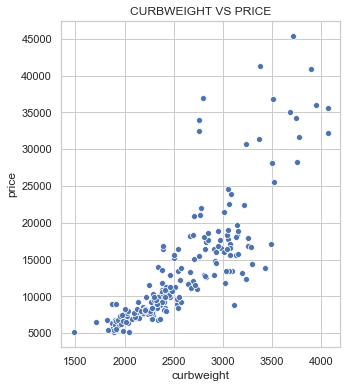

In [46]:
create_scatterplot(car_data, 'curbweight')

**Observation** - Curb height shows a positive correlation with price

<h3>17. ENGINE SIZE</h3>

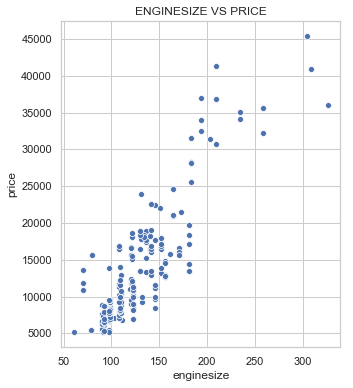

In [47]:
create_scatterplot(car_data, 'enginesize')

**Observation** - Engine size shows a positive correlation with price

<h3>18. BORE RATIO</h3>

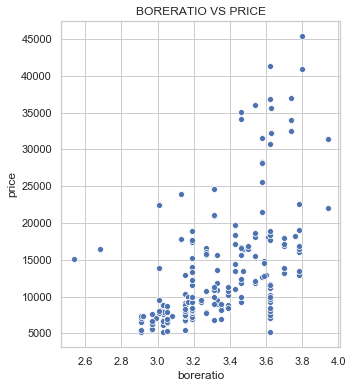

In [48]:
create_scatterplot(car_data, 'boreratio')

**Observation** - Bore ratio shows a positive correlation with price

<h3>19. STROKE</h3>

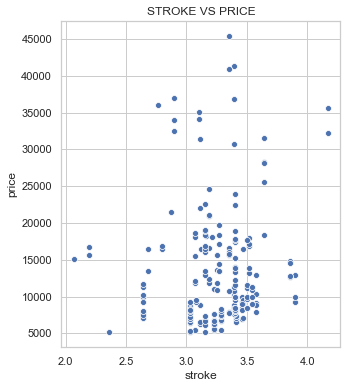

In [49]:
create_scatterplot(car_data, 'stroke')

**Observation** - There is not much visible trend between stroke and price

<h3>20. COMPRESSION RATIO</h3>

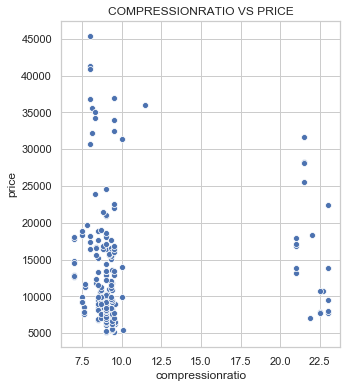

In [50]:
create_scatterplot(car_data, 'compressionratio')

**Observation** - There no linear relationship between stroke and price

<h3>21. HORSE POWER</h3>

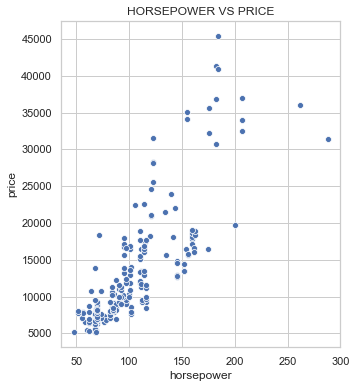

In [51]:
create_scatterplot(car_data, 'horsepower')

**Observation** - Horsepower shows a positive correlation with price

<h3>22. PEAK RPM</h3>

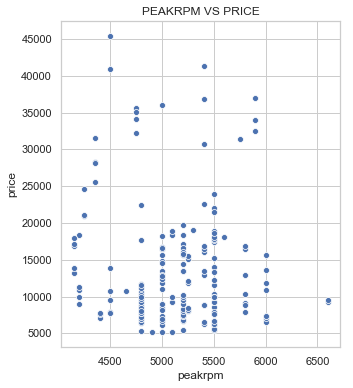

In [52]:
create_scatterplot(car_data, 'peakrpm')

**Observation** - There no linear relationship or visble trend between peak rpm and price

<h3>23. CITY MPG</h3>

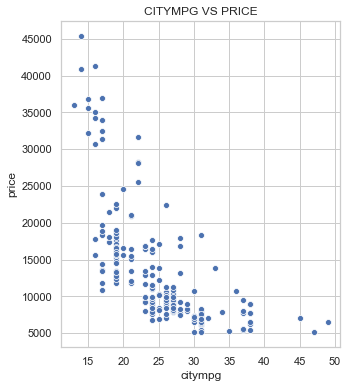

In [53]:
create_scatterplot(car_data, 'citympg')

**Observation** - There is a negative correlation between city mpg and price

<h3>24. HIGHWAY MPG</h3>

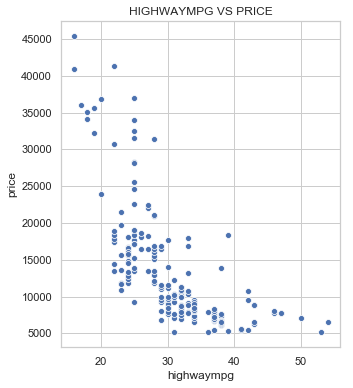

In [54]:
create_scatterplot(car_data, 'highwaympg')

**Observation** - There is a negative correlation between highway mpg and price

In [55]:
car_data['mpg_ratio'] = car_data.citympg/car_data.highwaympg

In [56]:
car_data[['mpg_ratio']].describe()

,mpg_ratio
count,205.00
mean,0.82
std,0.06
min,0.61
25%,0.79
50%,0.81
75%,0.84
max,1.00


<h3>IMPORTANT FEATURES</h3>

1. CarMake
2. symboling
3. fueltype
4. aspiration
5. carbody
6. drivewheel
7. enginetype
8. cylindernumber
9. fuelsystem
10. carlength
11. carwidth
12. curbweight
13. enginesize
14. boreratio
15. horsepower
16. citympg
17. highwaympg
18. wheelbase

# Step 3: DATA PREPERATION

Following are the features of interest:

In [57]:
features = ['CarMake','symboling', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 
           'fuelsystem', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg',
           'highwaympg', 'wheelbase']

In [58]:
features

['CarMake',
 'symboling',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'wheelbase']

In [59]:
CarsDF = car_data[features + ['price']]

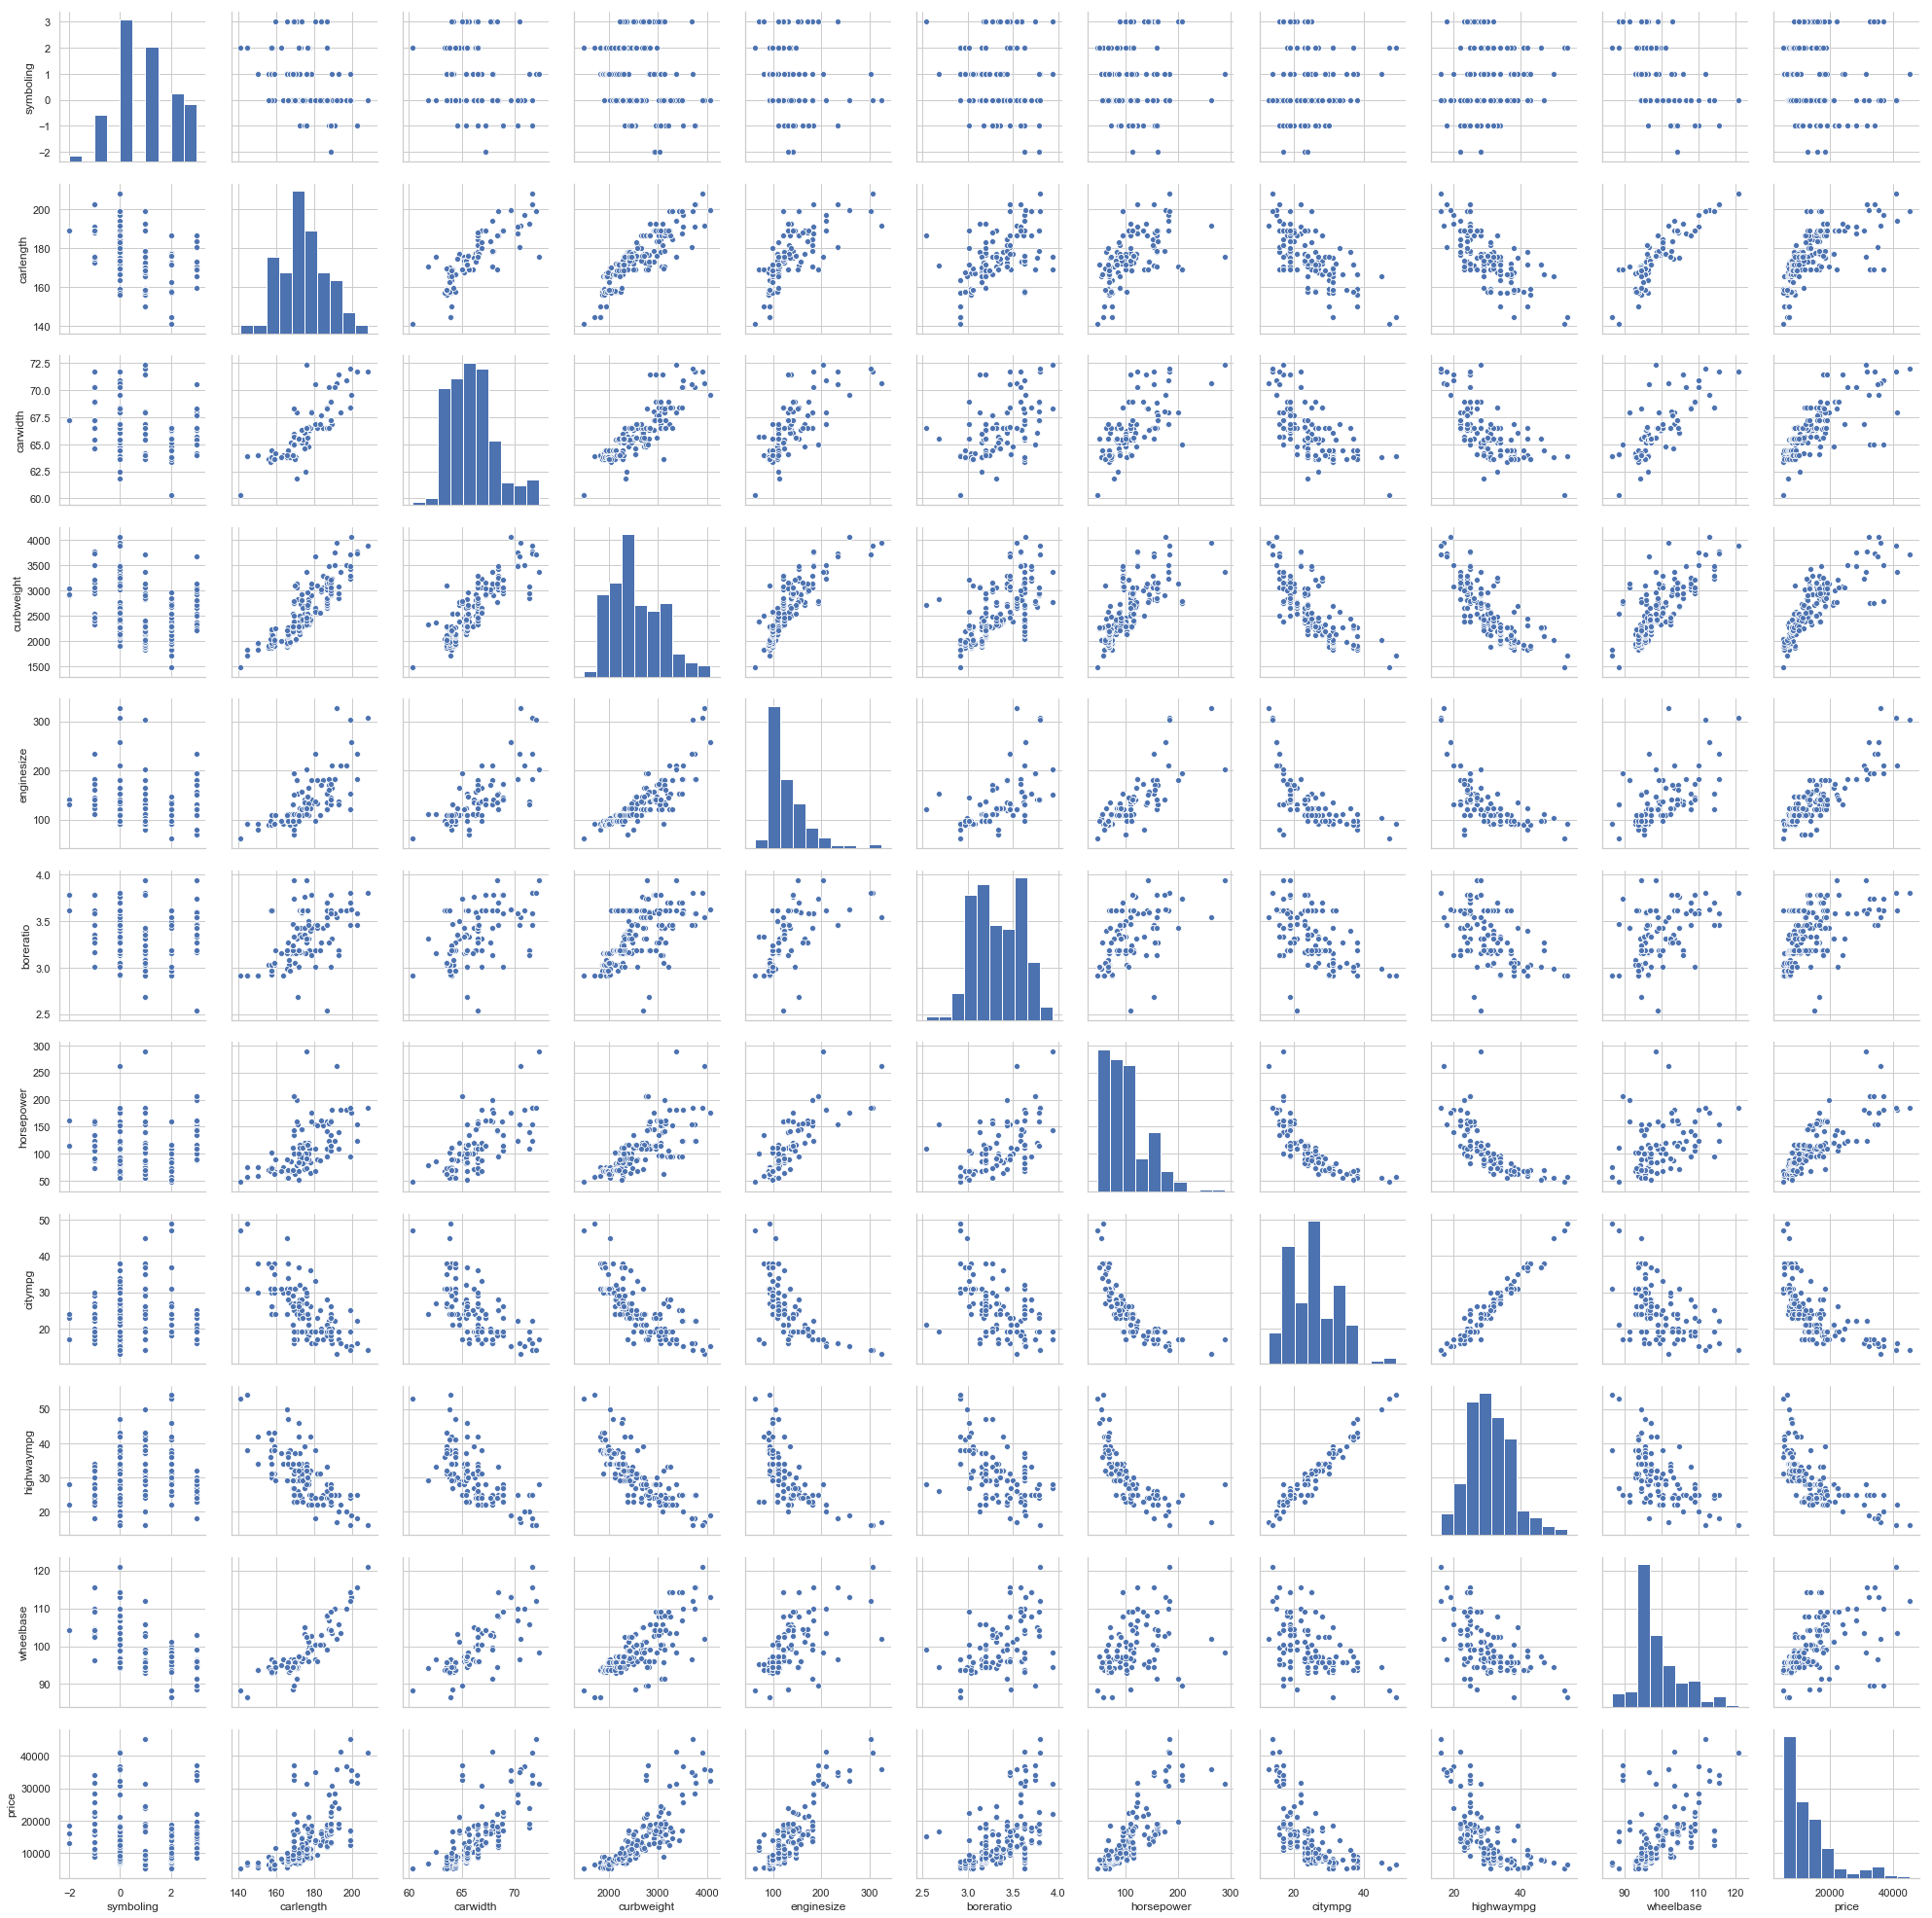

In [60]:
sns.pairplot(CarsDF)

In [61]:
CarsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
CarMake           205 non-null object
symboling         205 non-null int64
fueltype          205 non-null object
aspiration        205 non-null object
carbody           205 non-null object
drivewheel        205 non-null object
enginetype        205 non-null object
cylindernumber    205 non-null object
fuelsystem        205 non-null object
carlength         205 non-null float64
carwidth          205 non-null float64
curbweight        205 non-null int64
enginesize        205 non-null int64
boreratio         205 non-null float64
horsepower        205 non-null int64
citympg           205 non-null int64
highwaympg        205 non-null int64
wheelbase         205 non-null float64
price             205 non-null float64
dtypes: float64(5), int64(6), object(8)
memory usage: 30.5+ KB


In [62]:
feature_to_encode = ['CarMake','symboling', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem']

In [63]:
feature_to_scale = list(set(CarsDF.columns.tolist()) - set(feature_to_encode))

Following are the categorical features which need dummy encoding:

In [64]:
feature_to_encode

['CarMake',
 'symboling',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

Following are the numerical features which needs scaling:

In [65]:
feature_to_scale

['price',
 'citympg',
 'wheelbase',
 'enginesize',
 'carwidth',
 'boreratio',
 'curbweight',
 'carlength',
 'horsepower',
 'highwaympg']

**Performing dummy encoding on categorical variables**

In [66]:
for col in feature_to_encode:
    encoded_df = pd.get_dummies(CarsDF[col], drop_first = True)
    CarsDF = pd.concat([CarsDF, encoded_df], axis = 1)
    CarsDF.drop([col], axis = 1, inplace = True)

In [67]:
CarsDF.head()

,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,wheelbase,price,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,168.80,64.10,2548,130,3.47,111,21,27,88.60,13495.00,...,0,0,0,0,0,0,0,1,0,0
1,168.80,64.10,2548,130,3.47,111,21,27,88.60,16500.00,...,0,0,0,0,0,0,0,1,0,0
2,171.20,65.50,2823,152,2.68,154,19,26,94.50,16500.00,...,0,0,0,0,0,0,0,1,0,0
3,176.60,66.20,2337,109,3.19,102,24,30,99.80,13950.00,...,0,0,0,0,0,0,0,1,0,0
4,176.60,66.40,2824,136,3.19,115,18,22,99.40,17450.00,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [68]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(CarsDF, train_size = 0.7, test_size = 0.3, random_state = 100)

In [69]:
df_train[feature_to_scale].describe()

,price,citympg,wheelbase,enginesize,carwidth,boreratio,curbweight,carlength,horsepower,highwaympg
count,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00
mean,13056.35,25.39,98.52,124.96,65.84,3.31,2539.51,173.42,102.55,30.87
std,7807.04,6.70,5.96,40.97,2.21,0.26,544.65,12.60,39.72,6.97
min,5118.00,13.00,86.60,61.00,60.30,2.68,1488.00,141.10,48.00,17.00
25%,7554.00,19.00,94.50,97.00,63.95,3.06,2121.00,165.65,70.00,25.00
50%,10198.00,25.00,96.50,110.00,65.40,3.31,2405.00,172.00,94.00,31.00
75%,16465.00,31.00,101.20,141.00,66.90,3.54,2930.50,182.30,116.00,36.50
max,41315.00,49.00,115.60,326.00,72.30,3.94,4066.00,202.60,288.00,54.00


In [70]:
df_test[feature_to_scale].describe()

,price,citympg,wheelbase,enginesize,carwidth,boreratio,curbweight,carlength,horsepower,highwaympg
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,13784.97,24.82,99.30,131.40,66.06,3.38,2592.60,175.51,107.73,30.47
std,8436.65,6.19,6.17,43.15,1.99,0.29,462.72,11.68,39.21,6.73
min,5399.00,14.00,86.60,79.00,62.50,2.54,1819.00,144.60,52.00,16.00
25%,8460.50,19.00,95.70,108.00,64.60,3.19,2275.00,169.35,73.75,25.00
50%,10873.00,24.00,97.85,121.00,65.60,3.39,2535.00,174.80,100.50,30.00
75%,16601.25,29.00,103.15,144.75,66.50,3.62,2944.25,185.38,119.00,34.00
max,45400.00,38.00,120.90,308.00,72.00,3.80,3900.00,208.10,207.00,47.00


### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [71]:
scaler = MinMaxScaler()

In [72]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[feature_to_scale] = scaler.fit_transform(df_train[feature_to_scale])

In [73]:
df_train[feature_to_scale].describe()

,price,citympg,wheelbase,enginesize,carwidth,boreratio,curbweight,carlength,horsepower,highwaympg
count,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00
mean,0.22,0.34,0.41,0.24,0.46,0.50,0.41,0.53,0.23,0.37
std,0.22,0.19,0.21,0.15,0.18,0.21,0.21,0.20,0.17,0.19
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.07,0.17,0.27,0.14,0.30,0.31,0.25,0.40,0.09,0.22
50%,0.14,0.33,0.34,0.18,0.43,0.50,0.36,0.50,0.19,0.38
75%,0.31,0.50,0.50,0.30,0.55,0.68,0.56,0.67,0.28,0.53
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [74]:
y_train = df_train.pop('price')
X_train = df_train

# Step 5: MODEL BUILDING

Let's us perform the Recursive Feature Elimination. We will first reduce the number of features to 15. Then will perform the feature elimination based on the feature significance (p value) and colleniarity (based on VIF)

In [75]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

Let's print the columns with support (True indicates the feature is selected, False indicates it is discarded) and ranks as computed by the RFE

In [76]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('carlength', False, 19),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('citympg', False, 42),
 ('highwaympg', False, 9),
 ('wheelbase', False, 15),
 ('audi', False, 20),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 29),
 ('dodge', False, 25),
 ('honda', False, 24),
 ('isuzu', False, 39),
 ('jaguar', False, 38),
 ('mazda', False, 33),
 ('mercury', False, 46),
 ('mitsubishi', False, 21),
 ('nissan', False, 45),
 ('peugeot', False, 17),
 ('plymouth', False, 26),
 ('porsche', True, 1),
 ('renault', False, 22),
 ('saab', False, 16),
 ('subaru', True, 1),
 ('toyota', False, 31),
 ('volkswagen', False, 40),
 ('volvo', False, 3),
 (-1, False, 8),
 (0, False, 7),
 (1, False, 6),
 (2, False, 5),
 (3, False, 4),
 ('gas', False, 41),
 ('turbo', False, 37),
 ('hardtop', False, 13),
 ('hatchback', False, 11),
 ('sedan', False, 14),
 ('wagon', False, 12),
 ('fwd', False, 43),
 ('rwd', False, 27),
 ('

Let us now print only the columns which are selected by RFE

In [77]:
X_train.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'bmw', 'buick', 'porsche', 'subaru', 'ohcf', 'rotor', 'four', 'three',
       'twelve', 'two'],
      dtype='object')

In [78]:
df = X_train

In [79]:
X_train.columns

Index([ 'carlength',   'carwidth', 'curbweight', 'enginesize',  'boreratio',
       'horsepower',    'citympg', 'highwaympg',  'wheelbase',       'audi',
              'bmw',      'buick',  'chevrolet',      'dodge',      'honda',
            'isuzu',     'jaguar',      'mazda',    'mercury', 'mitsubishi',
           'nissan',    'peugeot',   'plymouth',    'porsche',    'renault',
             'saab',     'subaru',     'toyota', 'volkswagen',      'volvo',
                 -1,            0,            1,            2,            3,
              'gas',      'turbo',    'hardtop',  'hatchback',      'sedan',
            'wagon',        'fwd',        'rwd',      'dohcv',          'l',
              'ohc',       'ohcf',       'ohcv',      'rotor',       'five',
             'four',        'six',      'three',     'twelve',        'two',
             '2bbl',       '4bbl',        'idi',        'mfi',       'mpfi',
             'spdi',       'spfi'],
      dtype='object')

## Model 1:

1. Prepare the X-train
2. Add intercept to the X-train by calling add_constant
3. Train the model 
4. Print the summary details

In [80]:
X_train = X_train[X_train.columns[rfe.support_]]
X_train1 = sm.add_constant(X_train) #Adding the constant
lm1 = sm.OLS(y_train,X_train1).fit() # fitting the model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     112.2
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.12e-64
Time:                        13:15:07   Log-Likelihood:                 201.83
No. Observations:                 143   AIC:                            -373.7
Df Residuals:                     128   BIC:                            -329.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1795      0.039     -4.582      0.000      -0.257      -0.102
carwidth       0.2888      0.067      4.323      0.000       0.157       0.421
curbweight     0.2952      0.078      3.785      0.000       0.141       0.449
enginesize     0.4947      0.124      3.982      0.000       0.249       0.740
boreratio     -0.1435      0.061     -2.337      0.021      -0.265      -0.022
horsepower     0.1682      0.075      2.240      0.027       0.020       0.317
bmw            0.2722      0.030      9.219      0.000       0.214       0.331
buick          0.1548      0.035      4.385      0.000       0.085       0.225
porsche        0.1439      0.056      2.578      0.011       0.033       0.254
subaru        -0.3166      0.085     -3.710      0.000      -0.485      -0.148
ohcf           0.3371      0.082      4.109      0.000       0.175       0.499
rotor          0.0858      0.027      3.140      0.002       0.032       0.140
four           0.0394      0.031      1.268      0.207      -0.022       0.101
three          0.2066      0.077      2.672      0.009       0.054       0.360
twelve        -0.0438      0.087     -0.500      0.618      -0.217       0.129
two            0.0858      0.027      3.140      0.002       0.032       0.140
==============================================================================
Omnibus:                       23.538   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.980
Skew:                           0.802   Prob(JB):                     3.43e-09
Kurtosis:                       4.993   Cond. No.                     5.20e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.24e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Let us compute the VIF value for each columns.

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,rotor,inf
15,two,inf
0,const,56.45
10,ohcf,19.03
9,subaru,19.02
3,enginesize,13.47
2,curbweight,9.91
12,four,6.83
4,boreratio,5.91
5,horsepower,5.64


As we see overall model fit is good since prob(F) is very small. Also model is able to explain 92.5% variance and adjusted R squared is .916

VIF values for 'rotor' and 'cylinder number two' are perfectly correlated. Let's visualize its through heatmap. Hence we need to eliminate one, lets eliminate feature 'rotor'''

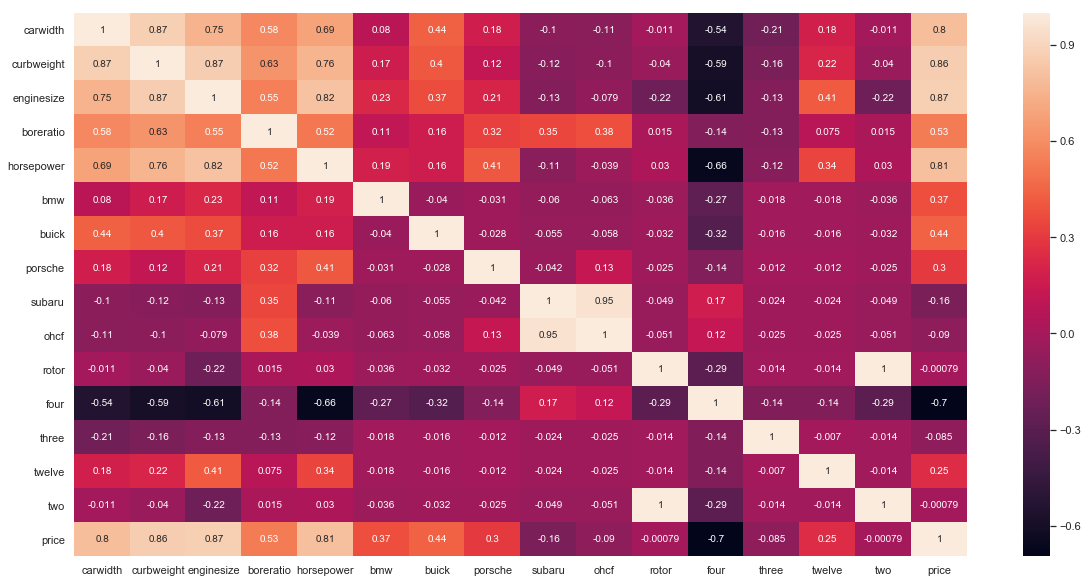

In [82]:
plt.figure(figsize = (20,10))  
sns.heatmap(pd.concat([X_train, y_train], axis = 1).corr(),annot = True)

## Model 2:

As described above let us remove feature rotor and build a new model

In [83]:
X_train = X_train.drop(columns = ['rotor'])
X_train2 = sm.add_constant(X_train) #Adding the constant
lm2 = sm.OLS(y_train,X_train2).fit() # fitting the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     112.2
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.12e-64
Time:                        13:15:09   Log-Likelihood:                 201.83
No. Observations:                 143   AIC:                            -373.7
Df Residuals:                     128   BIC:                            -329.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1795      0.039     -4.582      0.000      -0.257      -0.102
carwidth       0.2888      0.067      4.323      0.000       0.157       0.421
curbweight     0.2952      0.078      3.785      0.000       0.141       0.449
enginesize     0.4947      0.124      3.982      0.000       0.249       0.740
boreratio     -0.1435      0.061     -2.337      0.021      -0.265      -0.022
horsepower     0.1682      0.075      2.240      0.027       0.020       0.317
bmw            0.2722      0.030      9.219      0.000       0.214       0.331
buick          0.1548      0.035      4.385      0.000       0.085       0.225
porsche        0.1439      0.056      2.578      0.011       0.033       0.254
subaru        -0.3166      0.085     -3.710      0.000      -0.485      -0.148
ohcf           0.3371      0.082      4.109      0.000       0.175       0.499
four           0.0394      0.031      1.268      0.207      -0.022       0.101
three          0.2066      0.077      2.672      0.009       0.054       0.360
twelve        -0.0438      0.087     -0.500      0.618      -0.217       0.129
two            0.1716      0.055      3.140      0.002       0.063       0.280
==============================================================================
Omnibus:                       23.538   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.980
Skew:                           0.802   Prob(JB):                     3.43e-09
Kurtosis:                       4.993   Cond. No.                         46.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

See the R^2 and Adjusted R^2 remain same as previous model confirming our inference is correct. This is since rotor is not explaining anything which is not explained by feature "cylinder number two"

Now let us compute VIF values on the feature:

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.45
10,ohcf,19.03
9,subaru,19.02
3,enginesize,13.47
2,curbweight,9.91
11,four,6.83
4,boreratio,5.91
5,horsepower,5.64
1,carwidth,5.55
14,two,2.99


## Model 3:

As per above model based on p value, "cylinder number twelve" and "cylinder number four" features has got value greater than 0.05. But if we look at VIF feature 'ohcf' has a high VIF value. Also the above heat map shows there is 0.95 correlation between feature "subaru" and "ohcf". So let us first remove the feature "ohcf" it should not affect our model much.

In [85]:
X_train = X_train.drop(columns = ['ohcf'])
X_train3 = sm.add_constant(X_train) #Adding the constant
lm3 = sm.OLS(y_train,X_train3).fit() # fitting the model
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     106.4
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           2.75e-62
Time:                        13:15:09   Log-Likelihood:                 192.97
No. Observations:                 143   AIC:                            -357.9
Df Residuals:                     129   BIC:                            -316.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1414      0.040     -3.505      0.001      -0.221      -0.062
carwidth       0.2040      0.067      3.030      0.003       0.071       0.337
curbweight     0.3124      0.083      3.786      0.000       0.149       0.476
enginesize     0.5202      0.131      3.957      0.000       0.260       0.780
boreratio     -0.1210      0.065     -1.867      0.064      -0.249       0.007
horsepower     0.1407      0.079      1.775      0.078      -0.016       0.298
bmw            0.2590      0.031      8.326      0.000       0.197       0.321
buick          0.1580      0.037      4.223      0.000       0.084       0.232
porsche        0.2593      0.051      5.073      0.000       0.158       0.360
subaru         0.0149      0.029      0.505      0.614      -0.043       0.073
four           0.0182      0.033      0.561      0.576      -0.046       0.083
three          0.1644      0.081      2.024      0.045       0.004       0.325
twelve        -0.0420      0.093     -0.453      0.651      -0.225       0.141
two            0.1598      0.058      2.763      0.007       0.045       0.274
==============================================================================
Omnibus:                       22.333   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.826
Skew:                           0.777   Prob(JB):                     1.66e-08
Kurtosis:                       4.897   Cond. No.                         46.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's now compute the VIF on remaining features

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.28
3,enginesize,13.44
2,curbweight,9.88
10,four,6.64
4,boreratio,5.86
5,horsepower,5.60
1,carwidth,5.02
13,two,2.98
9,subaru,2.02
12,twelve,1.95


## Model 4:

Now we will remove the feature 'twelve' which has very high p value, so it might not be that significant

In [87]:
X_train = X_train.drop(columns = ['twelve'])
X_train4 = sm.add_constant(X_train) #Adding the constant
lm4 = sm.OLS(y_train,X_train4).fit() # fitting the model
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     116.0
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           2.77e-63
Time:                        13:15:10   Log-Likelihood:                 192.86
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     130   BIC:                            -321.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1333      0.036     -3.695      0.000      -0.205      -0.062
carwidth       0.2003      0.067      3.006      0.003       0.068       0.332
curbweight     0.3192      0.081      3.945      0.000       0.159       0.479
enginesize     0.4847      0.105      4.610      0.000       0.277       0.693
boreratio     -0.1097      0.060     -1.840      0.068      -0.228       0.008
horsepower     0.1361      0.078      1.737      0.085      -0.019       0.291
bmw            0.2595      0.031      8.377      0.000       0.198       0.321
buick          0.1606      0.037      4.357      0.000       0.088       0.233
porsche        0.2609      0.051      5.132      0.000       0.160       0.361
subaru         0.0112      0.028      0.396      0.693      -0.045       0.067
four           0.0117      0.029      0.403      0.688      -0.046       0.069
three          0.1543      0.078      1.981      0.050       0.000       0.308
two            0.1479      0.051      2.880      0.005       0.046       0.249
==============================================================================
Omnibus:                       23.509   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.513
Skew:                           0.806   Prob(JB):                     4.34e-09
Kurtosis:                       4.966   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's now compute the VIF on remaining features

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.90
2,curbweight,9.56
3,enginesize,8.64
5,horsepower,5.50
10,four,5.33
4,boreratio,5.00
1,carwidth,4.94
12,two,2.36
9,subaru,1.86
8,porsche,1.75


Since feature twelve was least significant there is no chnage in R^2 or squared R^2 compared with previous model

## Model 5:

We will remove the feature 'subaru' and make a new model

In [89]:
X_train = X_train.drop(columns = ['subaru'])
X_train5 = sm.add_constant(X_train) #Adding the constant
lm5 = sm.OLS(y_train,X_train5).fit() # fitting the model
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     127.3
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           2.58e-64
Time:                        13:15:10   Log-Likelihood:                 192.77
No. Observations:                 143   AIC:                            -361.5
Df Residuals:                     131   BIC:                            -326.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1295      0.035     -3.737      0.000      -0.198      -0.061
carwidth       0.1970      0.066      2.990      0.003       0.067       0.327
curbweight     0.3108      0.078      3.993      0.000       0.157       0.465
enginesize     0.4748      0.102      4.665      0.000       0.273       0.676
boreratio     -0.0940      0.044     -2.122      0.036      -0.182      -0.006
horsepower     0.1369      0.078      1.754      0.082      -0.018       0.291
bmw            0.2572      0.030      8.486      0.000       0.197       0.317
buick          0.1612      0.037      4.391      0.000       0.089       0.234
porsche        0.2546      0.048      5.287      0.000       0.159       0.350
four           0.0074      0.027      0.274      0.784      -0.046       0.060
three          0.1476      0.076      1.948      0.054      -0.002       0.297
two            0.1406      0.048      2.942      0.004       0.046       0.235
==============================================================================
Omnibus:                       22.411   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.546
Skew:                           0.772   Prob(JB):                     1.16e-08
Kurtosis:                       4.937   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train5.columns
vif['VIF'] = [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,39.82
2,curbweight,8.90
3,enginesize,8.15
5,horsepower,5.50
1,carwidth,4.87
9,four,4.57
4,boreratio,2.77
11,two,2.06
8,porsche,1.58
7,buick,1.51


## Model 6:

Now will remove feature 'four' since it is having highest p value as per previous model summary

In [91]:
X_train = X_train.drop(columns = ['four'])
X_train6 = sm.add_constant(X_train) #Adding the constant
lm6 = sm.OLS(y_train,X_train6).fit() # fitting the model
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           2.20e-65
Time:                        13:15:10   Log-Likelihood:                 192.73
No. Observations:                 143   AIC:                            -363.5
Df Residuals:                     132   BIC:                            -330.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1215      0.019     -6.510      0.000      -0.158      -0.085
carwidth       0.1943      0.065      2.992      0.003       0.066       0.323
curbweight     0.3087      0.077      3.999      0.000       0.156       0.461
enginesize     0.4662      0.097      4.829      0.000       0.275       0.657
boreratio     -0.0872      0.037     -2.387      0.018      -0.159      -0.015
horsepower     0.1311      0.075      1.750      0.082      -0.017       0.279
bmw            0.2546      0.029      8.878      0.000       0.198       0.311
buick          0.1594      0.036      4.426      0.000       0.088       0.231
porsche        0.2535      0.048      5.301      0.000       0.159       0.348
three          0.1383      0.068      2.046      0.043       0.005       0.272
two            0.1329      0.039      3.448      0.001       0.057       0.209
==============================================================================
Omnibus:                       22.172   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.688
Skew:                           0.757   Prob(JB):                     1.08e-08
Kurtosis:                       4.965   Cond. No.                         28.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train6.columns
vif['VIF'] = [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.63
2,curbweight,8.82
3,enginesize,7.39
5,horsepower,5.10
1,carwidth,4.76
4,boreratio,1.90
8,porsche,1.57
7,buick,1.46
10,two,1.35
6,bmw,1.10


## Model 7:

Next will eliminate horsepower feature as it has the highest p value which is greater than .05 from previous model

In [93]:
X_train = X_train.drop(columns = ['horsepower'])
X_train7 = sm.add_constant(X_train) #Adding the constant
lm7 = sm.OLS(y_train,X_train7).fit() # fitting the model
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     154.0
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           7.74e-66
Time:                        13:15:10   Log-Likelihood:                 191.09
No. Observations:                 143   AIC:                            -362.2
Df Residuals:                     133   BIC:                            -332.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1241      0.019     -6.618      0.000      -0.161      -0.087
carwidth       0.2025      0.065      3.102      0.002       0.073       0.332
curbweight     0.3307      0.077      4.309      0.000       0.179       0.483
enginesize     0.5612      0.080      6.976      0.000       0.402       0.720
boreratio     -0.0954      0.037     -2.614      0.010      -0.168      -0.023
bmw            0.2554      0.029      8.840      0.000       0.198       0.313
buick          0.1385      0.034      4.044      0.000       0.071       0.206
porsche        0.2921      0.043      6.826      0.000       0.207       0.377
three          0.1424      0.068      2.092      0.038       0.008       0.277
two            0.1577      0.036      4.364      0.000       0.086       0.229
==============================================================================
Omnibus:                       21.923   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.368
Skew:                           0.761   Prob(JB):                     2.09e-08
Kurtosis:                       4.903   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train6.columns
vif['VIF'] = [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.63
2,curbweight,8.82
3,enginesize,7.39
5,horsepower,5.10
1,carwidth,4.76
4,boreratio,1.90
8,porsche,1.57
7,buick,1.46
10,two,1.35
6,bmw,1.10


## Model 8:

Lets remove curbweight and build new model. Cubweight a high VIF of 8.59

In [95]:
X_train = X_train.drop(columns = ['curbweight'])
X_train8 = sm.add_constant(X_train) #Adding the constant
lm8 = sm.OLS(y_train,X_train8).fit() # fitting the model
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     151.1
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           3.45e-63
Time:                        13:15:10   Log-Likelihood:                 181.74
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     134   BIC:                            -318.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1426      0.019     -7.348      0.000      -0.181      -0.104
carwidth       0.3703      0.056      6.647      0.000       0.260       0.480
enginesize     0.7843      0.065     11.974      0.000       0.655       0.914
boreratio     -0.0509      0.037     -1.367      0.174      -0.125       0.023
bmw            0.2561      0.031      8.334      0.000       0.195       0.317
buick          0.1415      0.036      3.887      0.000       0.070       0.214
porsche        0.2406      0.044      5.505      0.000       0.154       0.327
three          0.1528      0.072      2.112      0.037       0.010       0.296
two            0.1865      0.038      4.938      0.000       0.112       0.261
==============================================================================
Omnibus:                       21.694   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.330
Skew:                           0.871   Prob(JB):                     7.05e-07
Kurtosis:                       4.310   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train8.columns
vif['VIF'] = [variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.95
1,carwidth,3.05
2,enginesize,2.96
3,boreratio,1.72
5,buick,1.30
6,porsche,1.14
8,two,1.13
4,bmw,1.10
7,three,1.06


## Model 9:

Next will have to remove boreration as it has 0.174 p value, which indicates it is insignificant

In [97]:
X_train = X_train.drop(columns = ['boreratio'])
X_train9 = sm.add_constant(X_train) #Adding the constant
lm9 = sm.OLS(y_train,X_train9).fit() # fitting the model
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           6.39e-64
Time:                        13:15:10   Log-Likelihood:                 180.75
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     135   BIC:                            -321.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1532      0.018     -8.575      0.000      -0.188      -0.118
carwidth       0.3478      0.053      6.514      0.000       0.242       0.453
enginesize     0.7672      0.065     11.893      0.000       0.640       0.895
bmw            0.2547      0.031      8.266      0.000       0.194       0.316
buick          0.1467      0.036      4.037      0.000       0.075       0.219
porsche        0.2261      0.043      5.316      0.000       0.142       0.310
three          0.1541      0.073      2.122      0.036       0.011       0.298
two            0.1816      0.038      4.815      0.000       0.107       0.256
==============================================================================
Omnibus:                       18.109   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.947
Skew:                           0.786   Prob(JB):                     1.71e-05
Kurtosis:                       4.101   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train9.columns
vif['VIF'] = [variance_inflation_factor(X_train9.values, i) for i in range(X_train9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.22
2,enginesize,2.85
1,carwidth,2.78
4,buick,1.29
7,two,1.12
3,bmw,1.10
5,porsche,1.07
6,three,1.06


Since p- values of all variables are within 0.05 and VIF of all features are within 5, this model can be considered as best fit model.


Also model has an R squared of 0.899 and adjusted R squared of 0.894. Model is able to explain almost 89.5% variance which is good. Overall model fit is also good as prob of F statistics is very small.

# Step 6: RESIDUAL ANALYSIS OF THE TRAINING DATA

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [99]:
y_train_price = lm9.predict(X_train9)

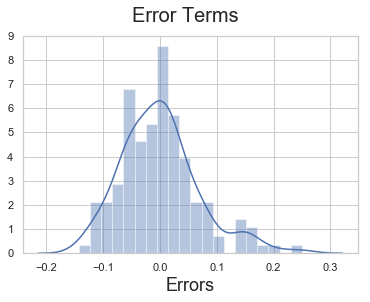

In [100]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

We can observe that residual follows normal distribution with mean 0

# Step 7: Prediction

In [101]:
feature_to_scale

['price',
 'citympg',
 'wheelbase',
 'enginesize',
 'carwidth',
 'boreratio',
 'curbweight',
 'carlength',
 'horsepower',
 'highwaympg']

Let us first scale the features of the test set

In [102]:
df_test[feature_to_scale] = scaler.transform(df_test[feature_to_scale])

In [103]:
df_test[feature_to_scale].describe()

,price,citympg,wheelbase,enginesize,carwidth,boreratio,curbweight,carlength,horsepower,highwaympg
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,0.24,0.33,0.44,0.27,0.48,0.56,0.43,0.56,0.25,0.36
std,0.23,0.17,0.21,0.16,0.17,0.23,0.18,0.19,0.16,0.18
min,0.01,0.03,0.00,0.07,0.18,-0.11,0.13,0.06,0.02,-0.03
25%,0.09,0.17,0.31,0.18,0.36,0.40,0.31,0.46,0.11,0.22
50%,0.16,0.31,0.39,0.23,0.44,0.56,0.41,0.55,0.22,0.35
75%,0.32,0.44,0.57,0.32,0.52,0.75,0.56,0.72,0.30,0.46
max,1.11,0.69,1.18,0.93,0.98,0.89,0.94,1.09,0.66,0.81


Let us store the y-actuals

In [104]:
y_test = df_test.pop('price')

In [105]:
X_test = df_test

In [106]:
X_test.describe()

,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,wheelbase,audi,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,...,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,0.56,0.48,0.43,0.27,0.56,0.25,0.33,0.36,0.44,0.03,...,0.00,0.00,0.00,0.26,0.00,0.11,0.02,0.50,0.05,0.02
std,0.19,0.17,0.18,0.16,0.23,0.16,0.17,0.18,0.21,0.18,...,0.00,0.00,0.00,0.44,0.00,0.32,0.13,0.50,0.22,0.13
min,0.06,0.18,0.13,0.07,-0.11,0.02,0.03,-0.03,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.46,0.36,0.31,0.18,0.40,0.11,0.17,0.22,0.31,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.55,0.44,0.41,0.23,0.56,0.22,0.31,0.35,0.39,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00
75%,0.72,0.52,0.56,0.32,0.75,0.30,0.44,0.46,0.57,0.00,...,0.00,0.00,0.00,0.75,0.00,0.00,0.00,1.00,0.00,0.00
max,1.09,0.98,0.94,0.93,0.89,0.66,0.69,0.81,1.18,1.00,...,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


In [107]:
X_train.columns

Index(['carwidth', 'enginesize', 'bmw', 'buick', 'porsche', 'three', 'two'], dtype='object')

In [108]:
X_test9 = X_test[X_train.columns]
X_test9 = sm.add_constant(X_test9)

In [109]:
X_test9.columns

Index(['const', 'carwidth', 'enginesize', 'bmw', 'buick', 'porsche', 'three',
       'two'],
      dtype='object')

Predict the values using the trained model

In [110]:
y_pred_m9 = lm9.predict(X_test9)

### Compute R squared value

In [111]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m9)

0.8871035188555043

### R2 Score of best fit model on training data: 0.8871035188555043

Text(0, 0.5, 'y_pred')

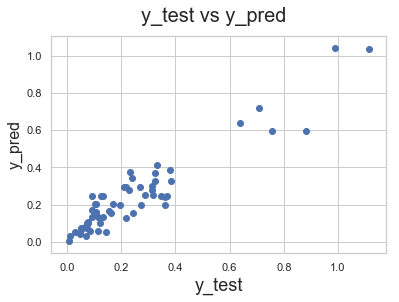

In [112]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m9)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

Nexr will plot the residual

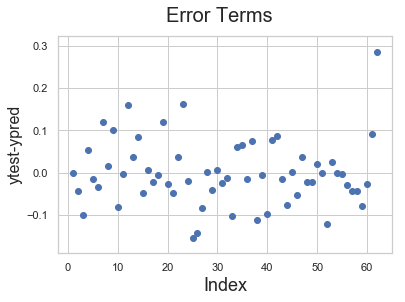

In [113]:
# Let us plot residuals
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.scatter(c,y_test-y_pred_m9)

fig.suptitle('Error Terms', fontsize=20) 
plt.xlabel('Index', fontsize=18)    
plt.ylabel('ytest-ypred', fontsize=16)
plt.show()

As the plot indicates, there is no visbile pattern for residual data and the residuals are centered around 0. Hence the assumption residuals are independent of each other and residuals are normally distributed with 0 holds good.

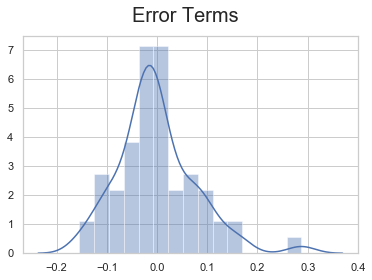

In [114]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test -y_pred_m9), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)
plt.show()

Now will plot actual price vs predicted price

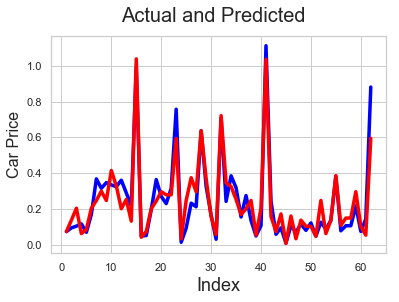

In [115]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m9, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)
plt.show()

## Linear Regression Model:


### We can see that the equation of our best fitted line is:

### Price = -0.1532 + 0.3478 × carwidth + 0.7672 × enginesize + 0.2547 × bmw + 0.1467 × buick + 0.2261 × porsche + 0.1541 × three + 0.1816 x two

Note: Three and two are cylinder numbers

<h2>MODEL BUILDING WITHOUT CONSIDERING CAR MAKER AS A FEATURE<h2>

As we can see the above best fit model mention other Car Companies details, which indicates geely auto can benchmark their pricing against those car makers. But still if the geely auto need to understand the impact of factors other than car maker, lets build a model without considering feature car maker.

In [116]:
features = ['symboling', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 
           'fuelsystem', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg',
           'highwaympg', 'wheelbase']

In [117]:
CarsDF = car_data[features + ['price']]

In [118]:
CarsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
symboling         205 non-null int64
fueltype          205 non-null object
aspiration        205 non-null object
carbody           205 non-null object
drivewheel        205 non-null object
enginetype        205 non-null object
cylindernumber    205 non-null object
fuelsystem        205 non-null object
carlength         205 non-null float64
carwidth          205 non-null float64
curbweight        205 non-null int64
enginesize        205 non-null int64
boreratio         205 non-null float64
horsepower        205 non-null int64
citympg           205 non-null int64
highwaympg        205 non-null int64
wheelbase         205 non-null float64
price             205 non-null float64
dtypes: float64(5), int64(6), object(7)
memory usage: 28.9+ KB


In [119]:
feature_to_encode = ['symboling', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem']

In [120]:
feature_to_scale = list(set(CarsDF.columns.tolist()) - set(feature_to_encode))

Following are the categorical features which need dummy encoding:

In [121]:
feature_to_encode

['symboling',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

Following are the numerical features which needs scaling:

In [122]:
feature_to_scale

['price',
 'citympg',
 'enginesize',
 'carwidth',
 'wheelbase',
 'boreratio',
 'curbweight',
 'carlength',
 'horsepower',
 'highwaympg']

**Performing dummy encoding on categorical variables**

In [123]:
for col in feature_to_encode:
    encoded_df = pd.get_dummies(CarsDF[col], drop_first = True)
    CarsDF = pd.concat([CarsDF, encoded_df], axis = 1)
    CarsDF.drop([col], axis = 1, inplace = True)

In [124]:
CarsDF.head()

,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,wheelbase,price,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,168.80,64.10,2548,130,3.47,111,21,27,88.60,13495.00,...,0,0,0,0,0,0,0,1,0,0
1,168.80,64.10,2548,130,3.47,111,21,27,88.60,16500.00,...,0,0,0,0,0,0,0,1,0,0
2,171.20,65.50,2823,152,2.68,154,19,26,94.50,16500.00,...,0,0,0,0,0,0,0,1,0,0
3,176.60,66.20,2337,109,3.19,102,24,30,99.80,13950.00,...,0,0,0,0,0,0,0,1,0,0
4,176.60,66.40,2824,136,3.19,115,18,22,99.40,17450.00,...,0,0,0,0,0,0,0,1,0,0


## Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [125]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(CarsDF, train_size = 0.7, test_size = 0.3, random_state = 100)

In [126]:
df_train[feature_to_scale].describe()

,price,citympg,enginesize,carwidth,wheelbase,boreratio,curbweight,carlength,horsepower,highwaympg
count,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00
mean,13056.35,25.39,124.96,65.84,98.52,3.31,2539.51,173.42,102.55,30.87
std,7807.04,6.70,40.97,2.21,5.96,0.26,544.65,12.60,39.72,6.97
min,5118.00,13.00,61.00,60.30,86.60,2.68,1488.00,141.10,48.00,17.00
25%,7554.00,19.00,97.00,63.95,94.50,3.06,2121.00,165.65,70.00,25.00
50%,10198.00,25.00,110.00,65.40,96.50,3.31,2405.00,172.00,94.00,31.00
75%,16465.00,31.00,141.00,66.90,101.20,3.54,2930.50,182.30,116.00,36.50
max,41315.00,49.00,326.00,72.30,115.60,3.94,4066.00,202.60,288.00,54.00


In [127]:
df_test[feature_to_scale].describe()

,price,citympg,enginesize,carwidth,wheelbase,boreratio,curbweight,carlength,horsepower,highwaympg
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,13784.97,24.82,131.40,66.06,99.30,3.38,2592.60,175.51,107.73,30.47
std,8436.65,6.19,43.15,1.99,6.17,0.29,462.72,11.68,39.21,6.73
min,5399.00,14.00,79.00,62.50,86.60,2.54,1819.00,144.60,52.00,16.00
25%,8460.50,19.00,108.00,64.60,95.70,3.19,2275.00,169.35,73.75,25.00
50%,10873.00,24.00,121.00,65.60,97.85,3.39,2535.00,174.80,100.50,30.00
75%,16601.25,29.00,144.75,66.50,103.15,3.62,2944.25,185.38,119.00,34.00
max,45400.00,38.00,308.00,72.00,120.90,3.80,3900.00,208.10,207.00,47.00


### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [128]:
scaler = MinMaxScaler()

In [129]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[feature_to_scale] = scaler.fit_transform(df_train[feature_to_scale])

In [130]:
df_train[feature_to_scale].describe()

,price,citympg,enginesize,carwidth,wheelbase,boreratio,curbweight,carlength,horsepower,highwaympg
count,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00
mean,0.22,0.34,0.24,0.46,0.41,0.50,0.41,0.53,0.23,0.37
std,0.22,0.19,0.15,0.18,0.21,0.21,0.21,0.20,0.17,0.19
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.07,0.17,0.14,0.30,0.27,0.31,0.25,0.40,0.09,0.22
50%,0.14,0.33,0.18,0.43,0.34,0.50,0.36,0.50,0.19,0.38
75%,0.31,0.50,0.30,0.55,0.50,0.68,0.56,0.67,0.28,0.53
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [131]:
y_train = df_train.pop('price')
X_train = df_train

# MODEL BUILDING

Let's us perform the Recursive Feature Elimination. We will first reduce the number of features to 15. Then will perform the feature elimination based on the feature significance (p value) and colleniarity (based on VIF)

In [132]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

Let's print the columns with support (True indicates the feature is selected, False indicates it is discarded) and ranks as computed by the RFE

In [133]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('carlength', False, 10),
 ('carwidth', False, 9),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 24),
 ('horsepower', True, 1),
 ('citympg', False, 17),
 ('highwaympg', True, 1),
 ('wheelbase', True, 1),
 (-1, False, 7),
 (0, False, 6),
 (1, False, 3),
 (2, False, 5),
 (3, False, 4),
 ('gas', False, 16),
 ('turbo', False, 25),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 20),
 ('rwd', False, 8),
 ('dohcv', True, 1),
 ('l', False, 23),
 ('ohc', False, 2),
 ('ohcf', True, 1),
 ('ohcv', False, 12),
 ('rotor', False, 13),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 22),
 ('twelve', True, 1),
 ('two', False, 14),
 ('2bbl', False, 21),
 ('4bbl', False, 15),
 ('idi', False, 19),
 ('mfi', False, 26),
 ('mpfi', False, 18),
 ('spdi', False, 11),
 ('spfi', False, 27)]

Let us now print only the columns which are selected by RFE

In [134]:
X_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'horsepower', 'highwaympg', 'wheelbase',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'ohcf', 'five',
       'four', 'six', 'twelve'],
      dtype='object')

In [135]:
df = X_train

In [136]:
X_train.columns

Index([ 'carlength',   'carwidth', 'curbweight', 'enginesize',  'boreratio',
       'horsepower',    'citympg', 'highwaympg',  'wheelbase',           -1,
                  0,            1,            2,            3,        'gas',
            'turbo',    'hardtop',  'hatchback',      'sedan',      'wagon',
              'fwd',        'rwd',      'dohcv',          'l',        'ohc',
             'ohcf',       'ohcv',      'rotor',       'five',       'four',
              'six',      'three',     'twelve',        'two',       '2bbl',
             '4bbl',        'idi',        'mfi',       'mpfi',       'spdi',
             'spfi'],
      dtype='object')

## Model 1:

1. Prepare the X-train
2. Add intercept to the X-train by calling add_constant
3. Train the model 
4. Print the summary details

In [137]:
X_train = X_train[X_train.columns[rfe.support_]]
X_train1 = sm.add_constant(X_train) #Adding the constant
lm1 = sm.OLS(y_train,X_train1).fit() # fitting the model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     57.30
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           4.91e-49
Time:                        13:15:17   Log-Likelihood:                 163.52
No. Observations:                 143   AIC:                            -295.0
Df Residuals:                     127   BIC:                            -247.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0462      0.071      0.653      0.515      -0.094       0.186
curbweight     0.2084      0.130      1.607      0.111      -0.048       0.465
enginesize     0.4442      0.142      3.121      0.002       0.163       0.726
horsepower     0.4953      0.137      3.609      0.000       0.224       0.767
highwaympg     0.1673      0.081      2.067      0.041       0.007       0.328
wheelbase      0.1792      0.080      2.238      0.027       0.021       0.338
hardtop       -0.0483      0.069     -0.698      0.486      -0.185       0.089
hatchback     -0.1443      0.051     -2.816      0.006      -0.246      -0.043
sedan         -0.1094      0.053     -2.069      0.041      -0.214      -0.005
wagon         -0.1443      0.056     -2.599      0.010      -0.254      -0.034
dohcv         -0.1835      0.123     -1.496      0.137      -0.426       0.059
ohcf           0.0151      0.027      0.566      0.573      -0.038       0.068
five          -0.0672      0.044     -1.530      0.128      -0.154       0.020
four          -0.1658      0.035     -4.756      0.000      -0.235      -0.097
six           -0.1309      0.045     -2.900      0.004      -0.220      -0.042
twelve        -0.2636      0.122     -2.163      0.032      -0.505      -0.022
==============================================================================
Omnibus:                       35.348   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.962
Skew:                           0.761   Prob(JB):                     3.69e-34
Kurtosis:                       7.850   Cond. No.                         45.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let us compute the VIF value for each columns.

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [138]:
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,106.86
1,curbweight,15.92
8,sedan,14.89
7,hatchback,12.64
3,horsepower,10.94
2,enginesize,10.27
9,wagon,7.59
5,wheelbase,5.75
14,six,5.01
13,four,4.98


## Model 2

Let's remove 'ohcf' which has got highest p value, so this feature is least significant

In [139]:
X_train = X_train.drop(columns = ['ohcf'])
X_train2 = sm.add_constant(X_train) #Adding the constant
lm2 = sm.OLS(y_train,X_train2).fit() # fitting the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     61.70
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           7.16e-50
Time:                        13:15:17   Log-Likelihood:                 163.34
No. Observations:                 143   AIC:                            -296.7
Df Residuals:                     128   BIC:                            -252.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0495      0.070      0.704      0.483      -0.090       0.189
curbweight     0.2022      0.129      1.569      0.119      -0.053       0.457
enginesize     0.4529      0.141      3.211      0.002       0.174       0.732
horsepower     0.4920      0.137      3.598      0.000       0.221       0.763
highwaympg     0.1584      0.079      2.000      0.048       0.002       0.315
wheelbase      0.1732      0.079      2.188      0.031       0.017       0.330
hardtop       -0.0415      0.068     -0.611      0.542      -0.176       0.093
hatchback     -0.1412      0.051     -2.778      0.006      -0.242      -0.041
sedan         -0.1049      0.052     -2.012      0.046      -0.208      -0.002
wagon         -0.1377      0.054     -2.544      0.012      -0.245      -0.031
dohcv         -0.1818      0.122     -1.486      0.140      -0.424       0.060
five          -0.0677      0.044     -1.547      0.124      -0.154       0.019
four          -0.1648      0.035     -4.745      0.000      -0.233      -0.096
six           -0.1315      0.045     -2.921      0.004      -0.221      -0.042
twelve        -0.2683      0.121     -2.213      0.029      -0.508      -0.028
==============================================================================
Omnibus:                       35.006   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.400
Skew:                           0.746   Prob(JB):                     2.97e-34
Kurtosis:                       7.867   Cond. No.                         45.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see after dropping 'ohcf' R squared remain as same as previous model

In [140]:
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,106.12
1,curbweight,15.81
8,sedan,14.55
7,hatchback,12.50
3,horsepower,10.92
2,enginesize,10.14
9,wagon,7.25
5,wheelbase,5.65
13,six,5.01
12,four,4.97


## Model 3

Let's remove 'hardtop' which has got highest p value, which is the least significant feature

In [141]:
X_train = X_train.drop(columns = ['hardtop'])
X_train3 = sm.add_constant(X_train) #Adding the constant
lm3 = sm.OLS(y_train,X_train3).fit() # fitting the model
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     66.74
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.03e-50
Time:                        13:15:17   Log-Likelihood:                 163.13
No. Observations:                 143   AIC:                            -298.3
Df Residuals:                     129   BIC:                            -256.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0368      0.067      0.550      0.583      -0.096       0.169
curbweight     0.2181      0.126      1.732      0.086      -0.031       0.467
enginesize     0.4608      0.140      3.288      0.001       0.183       0.738
horsepower     0.4684      0.131      3.580      0.000       0.210       0.727
highwaympg     0.1485      0.077      1.920      0.057      -0.005       0.301
wheelbase      0.1588      0.075      2.106      0.037       0.010       0.308
hatchback     -0.1202      0.037     -3.222      0.002      -0.194      -0.046
sedan         -0.0835      0.039     -2.166      0.032      -0.160      -0.007
wagon         -0.1177      0.043     -2.736      0.007      -0.203      -0.033
dohcv         -0.1735      0.121     -1.430      0.155      -0.413       0.066
five          -0.0704      0.043     -1.620      0.108      -0.156       0.016
four          -0.1662      0.035     -4.808      0.000      -0.235      -0.098
six           -0.1344      0.045     -3.010      0.003      -0.223      -0.046
twelve        -0.2712      0.121     -2.244      0.027      -0.510      -0.032
==============================================================================
Omnibus:                       33.619   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.972
Skew:                           0.695   Prob(JB):                     1.00e-33
Kurtosis:                       7.855   Cond. No.                         44.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see after dropping 'hardtop' R squared remain as same as previous model

In [142]:
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,96.88
1,curbweight,15.17
2,enginesize,10.06
3,horsepower,10.05
7,sedan,8.00
6,hatchback,6.77
5,wheelbase,5.15
12,six,4.96
11,four,4.94
8,wagon,4.60


## Model 4:

Let's remove 'dohcv' which has got highest p value

In [143]:
X_train = X_train.drop(columns = ['dohcv'])
X_train4 = sm.add_constant(X_train) #Adding the constant
lm4 = sm.OLS(y_train,X_train4).fit() # fitting the model
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     71.55
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           3.24e-51
Time:                        13:15:17   Log-Likelihood:                 162.01
No. Observations:                 143   AIC:                            -298.0
Df Residuals:                     130   BIC:                            -259.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0683      0.064      1.074      0.285      -0.057       0.194
curbweight     0.2428      0.125      1.939      0.055      -0.005       0.491
enginesize     0.4579      0.141      3.254      0.001       0.180       0.736
horsepower     0.3496      0.102      3.444      0.001       0.149       0.550
highwaympg     0.0983      0.069      1.421      0.158      -0.039       0.235
wheelbase      0.1443      0.075      1.924      0.057      -0.004       0.293
hatchback     -0.1238      0.037     -3.313      0.001      -0.198      -0.050
sedan         -0.0881      0.039     -2.284      0.024      -0.164      -0.012
wagon         -0.1274      0.043     -2.986      0.003      -0.212      -0.043
five          -0.0556      0.042     -1.312      0.192      -0.139       0.028
four          -0.1539      0.034     -4.579      0.000      -0.220      -0.087
six           -0.1048      0.040     -2.638      0.009      -0.183      -0.026
twelve        -0.2052      0.112     -1.830      0.070      -0.427       0.017
==============================================================================
Omnibus:                       38.168   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.950
Skew:                           0.813   Prob(JB):                     1.39e-39
Kurtosis:                       8.234   Cond. No.                         43.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see after dropping 'dohcv' R squared slightly low compared to previous model

In [144]:
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,86.47
1,curbweight,14.88
2,enginesize,10.06
7,sedan,7.94
6,hatchback,6.74
3,horsepower,6.00
5,wheelbase,5.05
10,four,4.64
8,wagon,4.49
11,six,3.89


## Model 5:

Let's remove 'five' which has got highest p value

In [145]:
X_train = X_train.drop(columns = ['five'])
X_train5 = sm.add_constant(X_train) #Adding the constant
lm5 = sm.OLS(y_train,X_train5).fit() # fitting the model
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     77.48
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           8.35e-52
Time:                        13:15:18   Log-Likelihood:                 161.07
No. Observations:                 143   AIC:                            -298.1
Df Residuals:                     131   BIC:                            -262.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0395      0.060      0.660      0.510      -0.079       0.158
curbweight     0.2509      0.125      2.000      0.048       0.003       0.499
enginesize     0.4321      0.140      3.093      0.002       0.156       0.708
horsepower     0.3703      0.101      3.682      0.000       0.171       0.569
highwaympg     0.1071      0.069      1.551      0.123      -0.030       0.244
wheelbase      0.1401      0.075      1.865      0.064      -0.009       0.289
hatchback     -0.1264      0.037     -3.375      0.001      -0.200      -0.052
sedan         -0.0941      0.038     -2.451      0.016      -0.170      -0.018
wagon         -0.1329      0.043     -3.123      0.002      -0.217      -0.049
four          -0.1243      0.025     -4.977      0.000      -0.174      -0.075
six           -0.0733      0.032     -2.310      0.022      -0.136      -0.011
twelve        -0.1685      0.109     -1.547      0.124      -0.384       0.047
==============================================================================
Omnibus:                       36.495   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.225
Skew:                           0.771   Prob(JB):                     2.95e-37
Kurtosis:                       8.085   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see after dropping 'five' R squared slightly low compared to previous model

In [146]:
vif = pd.DataFrame()
vif['Features'] = X_train5.columns
vif['VIF'] = [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.19
1,curbweight,14.85
2,enginesize,9.86
7,sedan,7.83
6,hatchback,6.72
3,horsepower,5.86
5,wheelbase,5.04
8,wagon,4.44
4,highwaympg,3.58
9,four,2.55


## Model 6:

Next will remove the feature 'twelve' as it is the least significant feature based on p value

In [147]:
X_train = X_train.drop(columns = ['twelve'])
X_train6 = sm.add_constant(X_train) #Adding the constant
lm6 = sm.OLS(y_train,X_train6).fit() # fitting the model
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     84.10
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           2.86e-52
Time:                        13:15:18   Log-Likelihood:                 159.77
No. Observations:                 143   AIC:                            -297.5
Df Residuals:                     132   BIC:                            -265.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0487      0.060      0.814      0.417      -0.070       0.167
curbweight     0.2967      0.123      2.421      0.017       0.054       0.539
enginesize     0.3215      0.121      2.664      0.009       0.083       0.560
horsepower     0.3607      0.101      3.575      0.000       0.161       0.560
highwaympg     0.1130      0.069      1.630      0.106      -0.024       0.250
wheelbase      0.1529      0.075      2.037      0.044       0.004       0.301
hatchback     -0.1380      0.037     -3.744      0.000      -0.211      -0.065
sedan         -0.1078      0.038     -2.868      0.005      -0.182      -0.033
wagon         -0.1510      0.041     -3.671      0.000      -0.232      -0.070
four          -0.1210      0.025     -4.838      0.000      -0.170      -0.072
six           -0.0523      0.029     -1.814      0.072      -0.109       0.005
==============================================================================
Omnibus:                       39.596   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.385
Skew:                           0.847   Prob(JB):                     1.24e-41
Kurtosis:                       8.361   Cond. No.                         37.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
vif = pd.DataFrame()
vif['Features'] = X_train6.columns
vif['VIF'] = [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,75.43
1,curbweight,14.02
7,sedan,7.42
2,enginesize,7.28
6,hatchback,6.45
3,horsepower,5.83
5,wheelbase,4.98
8,wagon,4.11
4,highwaympg,3.57
9,four,2.53


R squared value is almost same as that of previous model

## Model 7:

Next will remove highwaympg because of its higher p value

In [149]:
X_train = X_train.drop(columns = ['highwaympg'])
X_train7 = sm.add_constant(X_train) #Adding the constant
lm7 = sm.OLS(y_train,X_train7).fit() # fitting the model
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     92.00
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.06e-52
Time:                        13:15:18   Log-Likelihood:                 158.35
No. Observations:                 143   AIC:                            -296.7
Df Residuals:                     133   BIC:                            -267.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1090      0.047      2.302      0.023       0.015       0.203
curbweight     0.2294      0.116      1.976      0.050      -0.000       0.459
enginesize     0.3883      0.114      3.401      0.001       0.162       0.614
horsepower     0.2905      0.092      3.164      0.002       0.109       0.472
wheelbase      0.1457      0.075      1.932      0.055      -0.003       0.295
hatchback     -0.1283      0.037     -3.505      0.001      -0.201      -0.056
sedan         -0.0986      0.037     -2.637      0.009      -0.172      -0.025
wagon         -0.1431      0.041     -3.480      0.001      -0.224      -0.062
four          -0.1163      0.025     -4.652      0.000      -0.166      -0.067
six           -0.0515      0.029     -1.774      0.078      -0.109       0.006
==============================================================================
Omnibus:                       38.829   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.417
Skew:                           0.851   Prob(JB):                     2.20e-38
Kurtosis:                       8.120   Cond. No.                         33.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
vif = pd.DataFrame()
vif['Features'] = X_train7.columns
vif['VIF'] = [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.63
1,curbweight,12.43
6,sedan,7.25
2,enginesize,6.44
5,hatchback,6.28
4,wheelbase,4.97
3,horsepower,4.77
7,wagon,4.05
8,four,2.49
9,six,2.02


## Model 8:

Next will remove feature 'six' because of its higher p value

In [151]:
X_train = X_train.drop(columns = ['six'])
X_train8 = sm.add_constant(X_train) #Adding the constant
lm8 = sm.OLS(y_train,X_train8).fit() # fitting the model
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     101.5
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           4.77e-53
Time:                        13:15:18   Log-Likelihood:                 156.68
No. Observations:                 143   AIC:                            -295.4
Df Residuals:                     134   BIC:                            -268.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0929      0.047      1.983      0.049       0.000       0.186
curbweight     0.2659      0.115      2.309      0.022       0.038       0.494
enginesize     0.3302      0.110      2.995      0.003       0.112       0.548
horsepower     0.2829      0.092      3.061      0.003       0.100       0.466
wheelbase      0.1391      0.076      1.832      0.069      -0.011       0.289
hatchback     -0.1307      0.037     -3.546      0.001      -0.204      -0.058
sedan         -0.1015      0.038     -2.695      0.008      -0.176      -0.027
wagon         -0.1506      0.041     -3.654      0.000      -0.232      -0.069
four          -0.0947      0.022     -4.304      0.000      -0.138      -0.051
==============================================================================
Omnibus:                       26.877   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.425
Skew:                           0.500   Prob(JB):                     3.17e-26
Kurtosis:                       7.325   Cond. No.                         32.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
vif = pd.DataFrame()
vif['Features'] = X_train8.columns
vif['VIF'] = [variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.91
1,curbweight,12.04
6,sedan,7.24
5,hatchback,6.27
2,enginesize,5.91
4,wheelbase,4.95
3,horsepower,4.76
7,wagon,4.01
8,four,1.90


## Model 9:

Next will remove feature 'curbweight' because of its higher VIF value

In [153]:
X_train = X_train.drop(columns = ['curbweight'])
X_train9 = sm.add_constant(X_train) #Adding the constant
lm9 = sm.OLS(y_train,X_train9).fit() # fitting the model
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           5.82e-53
Time:                        13:15:18   Log-Likelihood:                 153.89
No. Observations:                 143   AIC:                            -291.8
Df Residuals:                     135   BIC:                            -268.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1173      0.046      2.530      0.013       0.026       0.209
enginesize     0.4482      0.099      4.517      0.000       0.252       0.644
horsepower     0.3781      0.084      4.500      0.000       0.212       0.544
wheelbase      0.2715      0.051      5.368      0.000       0.171       0.371
hatchback     -0.1496      0.037     -4.095      0.000      -0.222      -0.077
sedan         -0.1224      0.037     -3.300      0.001      -0.196      -0.049
wagon         -0.1525      0.042     -3.644      0.000      -0.235      -0.070
four          -0.0998      0.022     -4.489      0.000      -0.144      -0.056
==============================================================================
Omnibus:                       22.555   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.742
Skew:                           0.386   Prob(JB):                     1.98e-20
Kurtosis:                       6.825   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
vif = pd.DataFrame()
vif['Features'] = X_train9.columns
vif['VIF'] = [variance_inflation_factor(X_train9.values, i) for i in range(X_train9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.62
5,sedan,6.81
4,hatchback,5.96
1,enginesize,4.64
6,wagon,4.01
2,horsepower,3.81
3,wheelbase,2.13
7,four,1.88


## Model 10:

Next we can remove feature 'sedan' due to its VIF value

In [155]:
X_train = X_train.drop(columns = ['sedan'])
X_train10 = sm.add_constant(X_train) #Adding the constant
lm10 = sm.OLS(y_train,X_train10).fit() # fitting the model
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     119.7
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           9.23e-52
Time:                        13:15:19   Log-Likelihood:                 148.34
No. Observations:                 143   AIC:                            -282.7
Df Residuals:                     136   BIC:                            -261.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0151      0.036      0.422      0.674      -0.056       0.086
enginesize     0.5128      0.101      5.089      0.000       0.313       0.712
horsepower     0.3830      0.087      4.401      0.000       0.211       0.555
wheelbase      0.2050      0.048      4.267      0.000       0.110       0.300
hatchback     -0.0432      0.018     -2.428      0.016      -0.078      -0.008
wagon         -0.0358      0.023     -1.544      0.125      -0.082       0.010
four          -0.0962      0.023     -4.182      0.000      -0.142      -0.051
==============================================================================
Omnibus:                       20.936   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.337
Skew:                           0.464   Prob(JB):                     1.76e-14
Kurtosis:                       6.125   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
vif = pd.DataFrame()
vif['Features'] = X_train10.columns
vif['VIF'] = [variance_inflation_factor(X_train10.values, i) for i in range(X_train10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.58
1,enginesize,4.46
2,horsepower,3.81
6,four,1.88
3,wheelbase,1.79
4,hatchback,1.32
5,wagon,1.14


## Model 11:

Will remove 'wagon' since p value indicates it is not significant

In [157]:
X_train = X_train.drop(columns = ['wagon'])
X_train11 = sm.add_constant(X_train) #Adding the constant
lm11 = sm.OLS(y_train,X_train11).fit() # fitting the model
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           2.38e-52
Time:                        13:15:19   Log-Likelihood:                 147.10
No. Observations:                 143   AIC:                            -282.2
Df Residuals:                     137   BIC:                            -264.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0118      0.036      0.330      0.742      -0.059       0.083
enginesize     0.5374      0.100      5.375      0.000       0.340       0.735
horsepower     0.3712      0.087      4.261      0.000       0.199       0.543
wheelbase      0.1921      0.048      4.040      0.000       0.098       0.286
hatchback     -0.0363      0.017     -2.096      0.038      -0.071      -0.002
four          -0.0987      0.023     -4.280      0.000      -0.144      -0.053
==============================================================================
Omnibus:                       20.950   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.441
Skew:                           0.429   Prob(JB):                     1.37e-15
Kurtosis:                       6.279   Cond. No.                         23.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
vif = pd.DataFrame()
vif['Features'] = X_train11.columns
vif['VIF'] = [variance_inflation_factor(X_train11.values, i) for i in range(X_train11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.50
1,enginesize,4.35
2,horsepower,3.78
5,four,1.87
3,wheelbase,1.74
4,hatchback,1.24


# RESIDUAL ANALYSIS OF THE TRAINING DATA

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [159]:
y_train_price = lm11.predict(X_train11)

Text(0.5, 0, 'Errors')

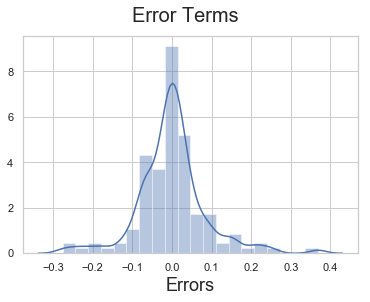

In [160]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

It shows a normal distribution with  Mean = 0

# Step 7: Prediction

In [161]:
feature_to_scale

['price',
 'citympg',
 'enginesize',
 'carwidth',
 'wheelbase',
 'boreratio',
 'curbweight',
 'carlength',
 'horsepower',
 'highwaympg']

In [162]:
df_test[feature_to_scale] = scaler.transform(df_test[feature_to_scale])

In [163]:
df_test[feature_to_scale].describe()

,price,citympg,enginesize,carwidth,wheelbase,boreratio,curbweight,carlength,horsepower,highwaympg
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,0.24,0.33,0.27,0.48,0.44,0.56,0.43,0.56,0.25,0.36
std,0.23,0.17,0.16,0.17,0.21,0.23,0.18,0.19,0.16,0.18
min,0.01,0.03,0.07,0.18,0.00,-0.11,0.13,0.06,0.02,-0.03
25%,0.09,0.17,0.18,0.36,0.31,0.40,0.31,0.46,0.11,0.22
50%,0.16,0.31,0.23,0.44,0.39,0.56,0.41,0.55,0.22,0.35
75%,0.32,0.44,0.32,0.52,0.57,0.75,0.56,0.72,0.30,0.46
max,1.11,0.69,0.93,0.98,1.18,0.89,0.94,1.09,0.66,0.81


In [164]:
y_test = df_test.pop('price')

In [165]:
X_test = df_test

In [166]:
X_test.describe()

,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,wheelbase,-1,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,...,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,0.56,0.48,0.43,0.27,0.56,0.25,0.33,0.36,0.44,0.15,...,0.00,0.00,0.00,0.26,0.00,0.11,0.02,0.50,0.05,0.02
std,0.19,0.17,0.18,0.16,0.23,0.16,0.17,0.18,0.21,0.36,...,0.00,0.00,0.00,0.44,0.00,0.32,0.13,0.50,0.22,0.13
min,0.06,0.18,0.13,0.07,-0.11,0.02,0.03,-0.03,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.46,0.36,0.31,0.18,0.40,0.11,0.17,0.22,0.31,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.55,0.44,0.41,0.23,0.56,0.22,0.31,0.35,0.39,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00
75%,0.72,0.52,0.56,0.32,0.75,0.30,0.44,0.46,0.57,0.00,...,0.00,0.00,0.00,0.75,0.00,0.00,0.00,1.00,0.00,0.00
max,1.09,0.98,0.94,0.93,0.89,0.66,0.69,0.81,1.18,1.00,...,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


In [167]:
X_train.columns

Index(['enginesize', 'horsepower', 'wheelbase', 'hatchback', 'four'], dtype='object')

In [168]:
X_test_final = X_test[X_train.columns]
X_test_final = sm.add_constant(X_test_final)

In [169]:
X_test_final.columns

Index(['const', 'enginesize', 'horsepower', 'wheelbase', 'hatchback', 'four'], dtype='object')

In [170]:
y_pred_final = lm11.predict(X_test_final)

### Lets compute r squared value

In [171]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_final)

0.8403013525288218

### The R squared value on the train set for the best fit model (without considering car company as feature) is 0.8403013525288218

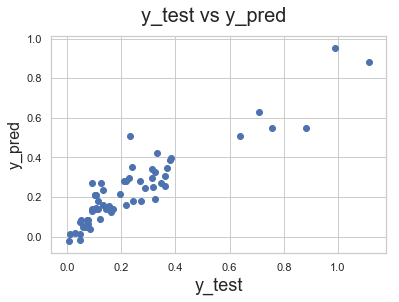

In [172]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_final)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

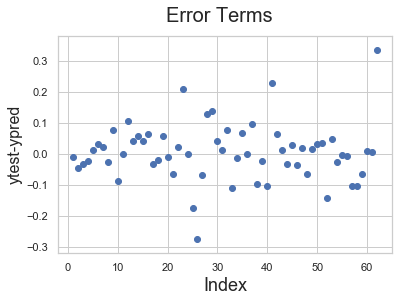

In [173]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.scatter(c,y_test-y_pred_final)

fig.suptitle('Error Terms', fontsize=20)  
plt.xlabel('Index', fontsize=18) 
plt.ylabel('ytest-ypred', fontsize=16)
plt.show()

We can see that the residuals are distributed around 0, and there is no visble pattern. Hence the assumption that residuals are independent of each other is honoured. Also the error terms are normally distributed with mean = 0

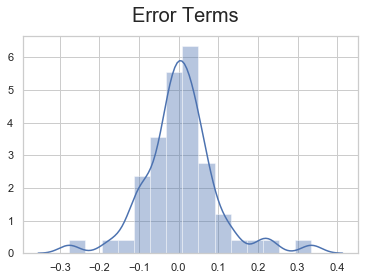

In [174]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test -y_pred_final), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)
plt.show()

We can observe that error terms are normally distributed, and mean = 0

Now will plot the actual value vs predicted value

Text(0, 0.5, 'Car Price')

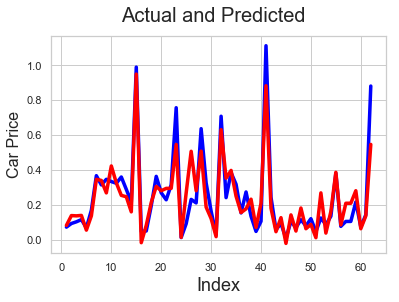

In [175]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")
plt.plot(c,y_pred_final, color="red",  linewidth=3.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Car Price', fontsize=16)  

Let us plot q-q plot to figure the error term is normally distributed or not

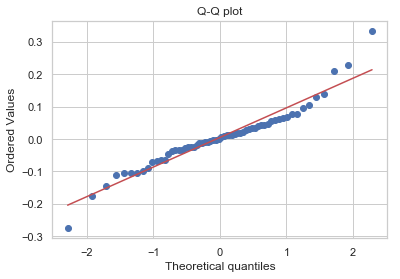

In [176]:
stats.probplot(y_test - y_pred_final, dist="norm", plot=plt)
plt.title("Q-Q plot")
plt.show()

We can observe that error terms follows the normal line closely

### Best fit regression line without conidering car company as a factor:

### Price = 0.0118 +  0.5374 x enginesize +  0.3712 x horsepower +  0.1921 x wheelbase + (-0.0363 x hatchback) +  (-0.0987 x  four)
